### Ablation study

In [31]:
### MRA 2024 Dataset (125 MRA)

import os
import shutil
from tqdm import tqdm
from natsort import natsorted

pred_folder = '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/predictions'
save_gt_folder = '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/ground-truth'
save_roi_folder = '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/roi-metadata'

os.makedirs(pred_folder, exist_ok=True)
os.makedirs(save_gt_folder, exist_ok=True)
os.makedirs(save_roi_folder, exist_ok=True)

seg_folder = '/home/hasna/miccai24_challenges/topcow_challenge_final/evals/cta_skr_bindice_nomir_5folds/steps'  #FIXME: 'cta' or 'mra'
gt_folder = '/home/hasna/datasets/TopCoW2024_Data_Release/cow_seg_labelsTr'
roi_folder = '/home/hasna/datasets/TopCoW2024_Data_Release/roi_loc_labelsTr'
nfolds = 5

step_name = 'step4-0_'
for i in range(nfolds):
    for file in tqdm(natsorted(os.listdir(os.path.join(seg_folder, f'fold_{i}')))):
        if file.startswith(step_name):
            init_name = os.path.join(seg_folder, f'fold_{i}', file)
            new_name = os.path.join(pred_folder, file.split(step_name)[-1])
            shutil.copy(init_name, new_name)

            init_name = os.path.join(gt_folder, file.split(step_name)[-1])
            new_name = os.path.join(save_gt_folder, file.split(step_name)[-1])
            # shutil.copy(init_name, new_name)

            init_name = os.path.join(roi_folder, (file.split(step_name)[-1]).split('.')[0]+'.txt')
            new_name = os.path.join(save_roi_folder, (file.split(step_name)[-1]).split('.')[0]+'.txt')
            # shutil.copy(init_name, new_name)


'''
REPLACE NUMBER IN HERE: 
/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/topcow24_eval/configs.py
'''

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 9038.38it/s]


'\nREPLACE NUMBER IN HERE: \n/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/topcow24_eval/configs.py\n'

In [9]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step1_mra.json', 'r') as file:
    metrics_step1 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2_mra.json', 'r') as file:
    metrics_step2 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2-0_mra.json', 'r') as file:
    metrics_step2_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3_mra.json', 'r') as file:
    metrics_step3 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3-0_mra.json', 'r') as file:
    metrics_step3_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step4-0_mra.json', 'r') as file:
    metrics_step4_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step5_mra.json', 'r') as file:
    metrics_step5 = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['without_pp', 'step1', 'step2', 'step2-0', 'step3', 'step3-0', 'step4-0', 'step_5', 'with_pp']
}

df = pd.DataFrame()
nround = 3

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_without_pp['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step1['aggregates'][metric]['mean'], nround)} ± {round(metrics_step1['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step4_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step4_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step5['aggregates'][metric]['mean'], nround)} ± {round(metrics_step5['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_with_pp['aggregates'][metric]['std'], nround)}"
    ]
table_data['f1_score'] = [f"{round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step1['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step1['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step5['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step5['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
# Convert the dictionary into a DataFrame
df = pd.concat([df, pd.DataFrame(table_data)])
df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score
0,without_pp,0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181,0.793 ± 0.091
1,step1,0.866 ± 0.062,0.991 ± 0.012,0.189 ± 0.157,5.111 ± 5.186,0.802 ± 0.094
2,step2,0.883 ± 0.055,0.992 ± 0.011,0.122 ± 0.121,3.429 ± 4.164,0.855 ± 0.085
3,step2-0,0.871 ± 0.059,0.986 ± 0.016,0.124 ± 0.12,3.523 ± 4.401,0.851 ± 0.07
4,step3,0.882 ± 0.055,0.989 ± 0.014,0.067 ± 0.076,3.446 ± 4.172,0.855 ± 0.085
5,step3-0,0.852 ± 0.064,0.983 ± 0.017,0.098 ± 0.096,5.168 ± 5.18,0.793 ± 0.091
6,step4-0,0.869 ± 0.063,0.986 ± 0.016,0.046 ± 0.063,3.536 ± 4.466,0.854 ± 0.058
7,step_5,0.883 ± 0.06,0.993 ± 0.01,0.046 ± 0.058,3.349 ± 4.27,0.868 ± 0.064
8,with_pp,0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206,0.861 ± 0.075


In [27]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

def extract_metric_data(metrics_with, method_name, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_with.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append(method_name)
                classes.append(met.split('_')[-1])
                values.append(val)
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})



# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
method_names = ['without_pp', 'step1', 'step2', 'step2-0', 'step3', 'step3-0', 'step4-0', 'step_5', 'with_pp']

list_file_paths = ['/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_without_pp.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step1_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2-0_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3-0_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step4-0_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step5_mra.json',
                   '/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_with_pp.json'
                   ]

B0_df = pd.DataFrame()
Dice_df = pd.DataFrame()
HD95_df = pd.DataFrame()

for i, file_path in enumerate(list_file_paths):
    with open(file_path, 'r') as file:
        metrics_data = json.load(file)

    data = extract_metric_data(metrics_data, method_names[i], 'B0')
    B0_df = pd.concat([B0_df, data])
    data = extract_metric_data(metrics_data, method_names[i], 'Dice')
    Dice_df = pd.concat([Dice_df, data])
    data = extract_metric_data(metrics_data, method_names[i], 'HD95')
    HD95_df = pd.concat([HD95_df, data])

# Display the merged DataFrame
merged_df = pd.DataFrame({'subjects': B0_df['subjects'], 'classes': B0_df['classes'], 'status': B0_df['status'], 'B0': B0_df['B0'], 'Dice': Dice_df['Dice'], 'HD95': HD95_df['HD95']})
# # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_tmp_todeletee.tsv', sep='\t')
merged_df

,subjects,classes,status,B0,Dice,HD95
0,sub_1,3rd-A2,without_pp,NaN,NaN,NaN
1,sub_2,3rd-A2,without_pp,NaN,NaN,NaN
2,sub_3,3rd-A2,without_pp,NaN,NaN,NaN
3,sub_4,3rd-A2,without_pp,2.0,0.000000,90.000000
4,sub_5,3rd-A2,without_pp,NaN,NaN,NaN
...,...,...,...,...,...,...
1870,sub_121,R-Pcom,with_pp,0.0,0.938542,0.296875
1871,sub_122,R-Pcom,with_pp,NaN,NaN,NaN
1872,sub_123,R-Pcom,with_pp,0.0,0.959589,0.296875
1873,sub_124,R-Pcom,with_pp,NaN,NaN,NaN


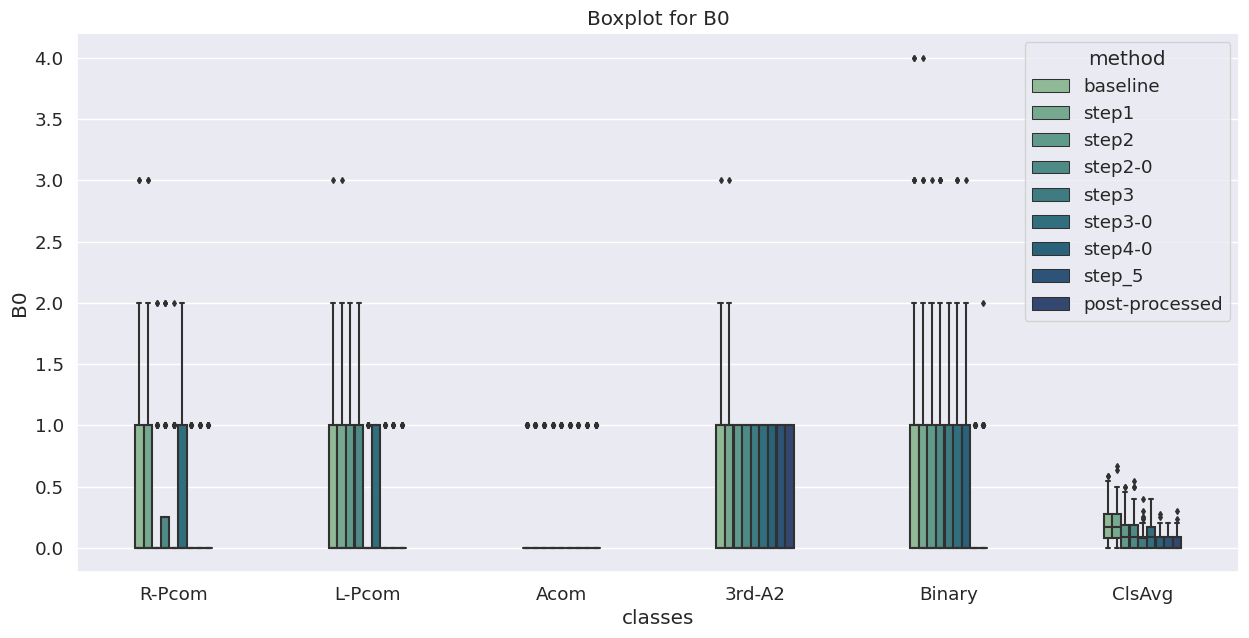

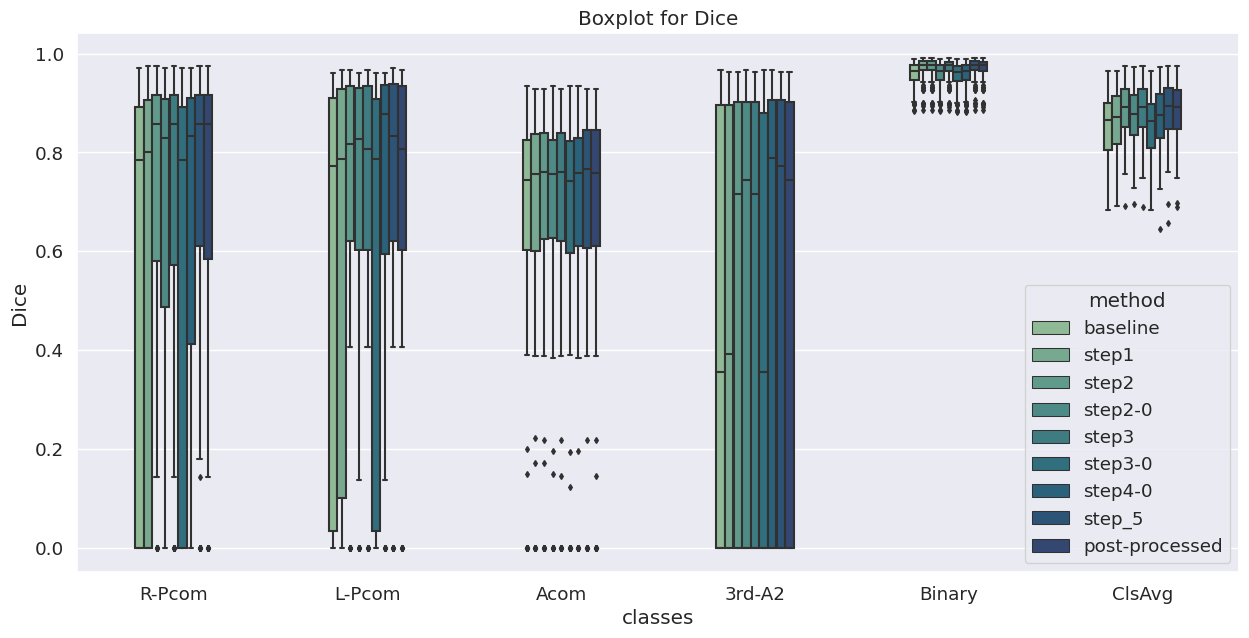

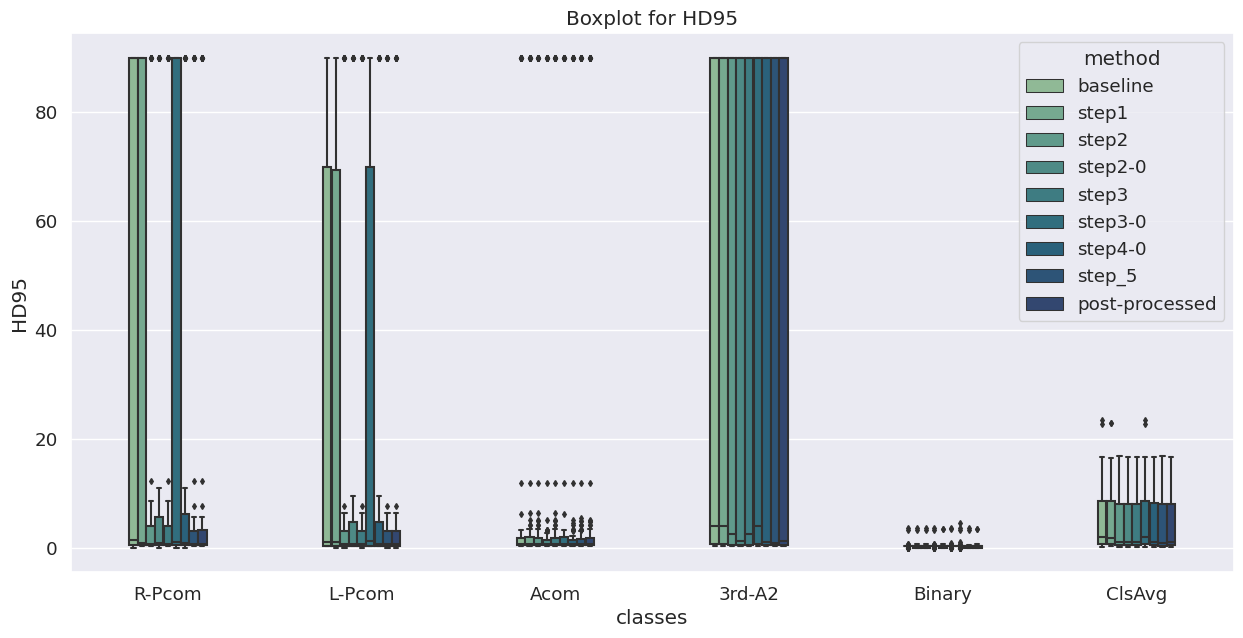

In [ ]:
### Boxplots by test set metric WITH STAT TEST PAIRED

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


df_exps = merged_df.copy() #pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
# desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
desired_classes = ['R-Pcom', 'L-Pcom', 'Acom', '3rd-A2', 'Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'baseline', 'with_pp': 'post-processed'})

df_exps.rename(columns={'status': 'method'}, inplace=True)

for met in ['B0', 'Dice', 'HD95']:
    hue_plot_params = {
        'data': df_exps,
        'x': 'classes',
        'y': met,
        "hue": "method",
        "palette": 'crest',  # 'flare' or 'crest'
        "width": 0.4, 
        "fliersize": 3,
        "order":desired_classes, 
    }
    sns.set_theme(rc={'figure.figsize':(15,7)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    plt.title(f'Boxplot for {met}')
    plt.show()


In [33]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step1_cta.json', 'r') as file:
    metrics_step1 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2_cta.json', 'r') as file:
    metrics_step2 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2-0_cta.json', 'r') as file:
    metrics_step2_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3_cta.json', 'r') as file:
    metrics_step3 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3-0_cta.json', 'r') as file:
    metrics_step3_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step4-0_cta.json', 'r') as file:
    metrics_step4_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step5_cta.json', 'r') as file:
    metrics_step5 = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['without_pp', 'step1', 'step2', 'step2-0', 'step3', 'step3-0', 'step4-0', 
               'step_5', 'with_pp']
}

df = pd.DataFrame()
nround = 3

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_without_pp['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step1['aggregates'][metric]['mean'], nround)} ± {round(metrics_step1['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step4_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step4_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step5['aggregates'][metric]['mean'], nround)} ± {round(metrics_step5['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_with_pp['aggregates'][metric]['std'], nround)}"
    ]
table_data['f1_score'] = [f"{round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step1['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step1['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step5['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step5['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
# Convert the dictionary into a DataFrame
df = pd.concat([df, pd.DataFrame(table_data)])
df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score
0,without_pp,0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.21,6.987 ± 6.088,0.72 ± 0.167
1,step1,0.815 ± 0.07,0.985 ± 0.015,0.257 ± 0.203,6.899 ± 5.934,0.747 ± 0.146
2,step2,0.844 ± 0.067,0.988 ± 0.013,0.112 ± 0.122,4.171 ± 4.719,0.845 ± 0.096
3,step2-0,0.823 ± 0.074,0.975 ± 0.027,0.123 ± 0.119,4.302 ± 4.828,0.812 ± 0.121
4,step3,0.842 ± 0.067,0.985 ± 0.016,0.064 ± 0.075,4.184 ± 4.713,0.836 ± 0.111
5,step3-0,0.822 ± 0.074,0.973 ± 0.028,0.064 ± 0.077,4.312 ± 4.818,0.815 ± 0.122
6,step4-0,0.819 ± 0.075,0.976 ± 0.027,0.047 ± 0.06,4.564 ± 4.957,0.82 ± 0.105
7,step_5,0.842 ± 0.071,0.989 ± 0.013,0.046 ± 0.055,4.295 ± 4.785,0.845 ± 0.096
8,with_pp,0.839 ± 0.068,0.985 ± 0.015,0.056 ± 0.066,4.297 ± 4.655,0.838 ± 0.103


### Extra stuff

In [ ]:
# # export CUDA_PATH=/usr/local/cuda-12.1

[ True]
[False  True]


In [ ]:

import numpy as np
from scipy.spatial.distance import cdist
from scipy.ndimage import label, distance_transform_edt, binary_dilation, generate_binary_structure

for file in ['topcow_mr_041.nii.gz']:
    bin_img = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/bin/fold_1/'+file).get_fdata()
    img_nib = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/without_pp/fold_1/'+file)
    mul_img = img_nib.get_fdata()
    print(file)


pred_array_mul = replace_background_with_nearest_label(mul_img, bin_img)
segmentation = pred_array_mul.copy()
volume_threshold = 20
for i in np.unique(segmentation):  # Iterate over each label to check their respective disconnected components
    # Label the connected components
    labeled_array, num_features = label(segmentation==i)

    # Iterate over the labeled components
    for component_label in range(1, num_features + 1):  # Skip background (label 0)
        component_mask = (labeled_array == component_label)
        
        # Calculate the volume of the current component
        volume = np.sum(component_mask)
        print(f'Label {i}, component label {component_label}, volume {volume}')
        # If the component volume is smaller than the threshold, remove it by setting it to 0
        if volume < volume_threshold:
            segmentation[component_mask] = 0



In [3]:
import os
import nibabel as nib
from natsort import natsorted

from src.post_processings import *
from skimage.morphology import erosion, ball  #FIXME:

def final_check(multiclass_image):
    """
    This function is used as a final check, to remove disconnected components that were not previously removed (>volume_threshold), or relabel them as the structure that is connected to them (to ensure continuity..hopefully!).
    Parameters:
    - multiclass_image: 3D numpy array representing the multiclass prediction.
    Returns:
    - new_mask: 3D numpy array representing the corrected multiclass prediction.
    """

    new_mask = multiclass_image.copy()

    for i in np.unique(multiclass_image): # Iterate over each class to check for the disconnected components
        binary_image = 1*(new_mask==i)  # Dealing with 1 class at a time
        labeled_image, num_features = label(binary_image)

        while num_features > 1:  # In case even after trying to link disconnected components, there are stil some remaining, then we either remove them (if they are not connected to anything) or relabel them (if they have neighboring component, they take that label)
            # Identify the smallest component and its volume
            component_volumes = [np.sum(labeled_image == i) for i in range(1, num_features + 1)]
            smallest_component_idx = np.argmin(component_volumes) + 1  # Adjust for label index (1-based)
            # Get coordinates of the smallest component
            smallest_component_coords = np.argwhere(labeled_image == smallest_component_idx)

            # Check connectivity to other components using the multiclass_image mask
            if smallest_component_coords.size > 0:
                # Get neighboring voxel values using a dilated mask
                struct = generate_binary_structure(3, 1)
                dilated_mask = binary_dilation(labeled_image == smallest_component_idx, structure=struct)
                
                neighboring_indices = np.argwhere(dilated_mask & (labeled_image != smallest_component_idx))
                neighboring_labels = new_mask[neighboring_indices[:, 0], neighboring_indices[:, 1], neighboring_indices[:, 2]]  # Get the neighboring labels (intersection between multiclass mask and the dilated one..)
                
                unique_labels = np.unique(neighboring_labels[neighboring_labels > 0])
                if len(unique_labels) > 0:  # A neighboring component exists..                    
                    # Assign the label of the first neighbor component to the current one
                    new_label = unique_labels[0]
                    print('Here! label', i, 'is now:', new_label)
                    new_mask[labeled_image == smallest_component_idx] = new_label
                else:  # No neighboring components..
                    # Delete that component
                    print('Delete label:', i)
                    new_mask[labeled_image == smallest_component_idx] = 0
                
                labeled_image, num_features = label(1*(new_mask==i))  # Recompute the connected components to check if there are still some disconnexions (in which case, stay in the loop..).

    return new_mask



# bin_img = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/bin/fold_1/topcow_mr_036.nii.gz').get_fdata()
# img_nib = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_036.nii.gz')
# for file in natsorted(os.listdir('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/bin/fold_4')):
for file in ['topcow_mr_015.nii.gz']:
    bin_img = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/bin/fold_4/'+file).get_fdata()
    img_nib = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/without_pp/fold_4/'+file)
    mul_img = img_nib.get_fdata()
    print(file)


    pred_array_mul = replace_background_with_nearest_label(mul_img, bin_img)
    # nib.save(nib.Nifti1Image(pred_array_mul, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_036_pred_array_mul.nii.gz')

    cleaned_arr = clean_small_components(pred_array_mul, 20)  # Cleaning the small disconnected volumes
    # nib.save(nib.Nifti1Image(cleaned_arr, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_036_cleaned_arr_1.nii.gz')

    new_arr = np.zeros(cleaned_arr.shape)  # New array to store the modifications (bridges)
    for i in np.unique(cleaned_arr):
        binary_image = 1*(cleaned_arr==i)  # Dealing with 1 label class per time
        _, nums = label(binary_image)
        print('label:', i, 'nums:', nums)

        if nums > 1:  # If for that specific label, there are more than 1 component (thus, disconnexions)
            dilated = link_components(binary_image)  # Link between the two closest points of the two closest components by dilating the line connecting them and multiply it by their class label
            dilated_corrected = 1*( (dilated - 1*(cleaned_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was originally there..
            dilated_corrected = i*( (dilated_corrected - 1*(new_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was previously dilated from other accumulated labels...
            
            _, nums_2 = label(1*(dilated_corrected>0))  #FIXME:
            if nums_2 > 1:  #FIXME:
                print('give original dilated_link, for having:', nums_2)
                # overlap = dilated & (1*(cleaned_arr>0))
                # dilated_corrected = i*((dilated + overlap) > 0)
                A_eroded = erosion(dilated, ball(1))  # Erosion with a ball of radius 1
                B_eroded = erosion(1*(cleaned_arr>0), ball(1))
                # 2. Find the boundaries of A and B
                boundary_A = dilated - A_eroded
                boundary_B = 1*(cleaned_arr>0) - B_eroded
                # 3. The border between A and B is the intersection of the boundaries
                border_AB = boundary_A & boundary_B
                dilated_corrected = i*(border_AB > 0)
                new_arr[dilated_corrected !=0] = 0
            new_arr += (dilated_corrected.astype(np.uint8))
        # TODO: ADD HERE A CONDITION IN CASE IT REMOVES THE DISCONNEXION --> In which case, erode it to keep only the connecting line..??
    # corrected = new_arr*((1*(new_arr>0) - 1*(cleaned_arr>0)) > 0)  # Getting the final extra voxels (from bridges) to not interfer with the original + multiplying by the new_arr to get the classes in the binary (subtraction)
    corrected = new_arr #new_arr*((1*(new_arr>0) - 1*(cleaned_arr>0)) > 0)    #FIXME:
    cleaned_arr[corrected != 0] = 0  # Replace only where there is no interferance with the other labels !!
    cleaned_arr += (corrected.astype(np.uint8))  # Adding the final extra voxel to the original, after previously replacing the original with 0 where it should..
    # # nib.save(nib.Nifti1Image(cleaned_arr, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_cleaned_arr_2_vol20.nii.gz')

    for i in np.unique(cleaned_arr):
        binary_image = 1*(cleaned_arr==i)  # Dealing with 1 label class per time
        _, nums = label(binary_image)
        print('label:', i, 'nums:', nums)

    pred_array = final_check(cleaned_arr)  # Final checking: if a certain label has disconnected components, the smallest is either deleted (if it's not connected to anything) or takes the label of its neighbour (to ensure continuity)..
    pred_array[pred_array == 13] = 15  # Last one just in case..
    # # nib.save(nib.Nifti1Image(pred_array, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_afterpp_vol20.nii.gz')

#FIXME: THIS ONE

topcow_mr_015.nii.gz
label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 2
give original dilated_link, for having: 2
label: 3.0 nums: 2
label: 4.0 nums: 2
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 4
give original dilated_link, for having: 5
label: 12.0 nums: 4
give original dilated_link, for having: 3
label: 15.0 nums: 1
label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 2
label: 3.0 nums: 2
label: 4.0 nums: 1
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 7
label: 12.0 nums: 10
label: 15.0 nums: 1
Delete label: 2.0
Delete label: 3.0
Here! label 11.0 is now: 10.0
Here! label 11.0 is now: 15.0
Here! label 11.0 is now: 15.0
Here! label 11.0 is now: 12.0
Here! label 11.0 is now: 12.0
Here! label 11.0 is now: 12.0
Here! label 12.0 is now: 10.0
Here! label 12.0 is now: 10.0
Here! label 12.0 is now: 10.0
Here! label 12.0 is now: 6.0
Here! label 12.

In [ ]:
# # nib.save(nib.Nifti1Image(pred_array, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_015_beforepp_vol20__sos.nii.gz')


In [3]:
import os
import nibabel as nib
from natsort import natsorted

from src.post_processings import *


def final_check(multiclass_image):
    """
    This function is used as a final check, to remove disconnected components that were not previously removed (>volume_threshold), or relabel them as the structure that is connected to them (to ensure continuity..hopefully!).
    Parameters:
    - multiclass_image: 3D numpy array representing the multiclass prediction.
    Returns:
    - new_mask: 3D numpy array representing the corrected multiclass prediction.
    """

    new_mask = multiclass_image.copy()

    for i in np.unique(multiclass_image): # Iterate over each class to check for the disconnected components
        binary_image = 1*(new_mask==i)  # Dealing with 1 class at a time
        labeled_image, num_features = label(binary_image)

        while num_features > 1:  # In case even after trying to link disconnected components, there are stil some remaining, then we either remove them (if they are not connected to anything) or relabel them (if they have neighboring component, they take that label)
            # Identify the smallest component and its volume
            component_volumes = [np.sum(labeled_image == i) for i in range(1, num_features + 1)]
            smallest_component_idx = np.argmin(component_volumes) + 1  # Adjust for label index (1-based)
            # Get coordinates of the smallest component
            smallest_component_coords = np.argwhere(labeled_image == smallest_component_idx)

            # Check connectivity to other components using the multiclass_image mask
            if smallest_component_coords.size > 0:
                # Get neighboring voxel values using a dilated mask
                struct = generate_binary_structure(3, 1)
                dilated_mask = binary_dilation(labeled_image == smallest_component_idx, structure=struct)
                
                neighboring_indices = np.argwhere(dilated_mask & (labeled_image != smallest_component_idx))
                neighboring_labels = new_mask[neighboring_indices[:, 0], neighboring_indices[:, 1], neighboring_indices[:, 2]]  # Get the neighboring labels (intersection between multiclass mask and the dilated one..)
                
                unique_labels = np.unique(neighboring_labels[neighboring_labels > 0])
                if len(unique_labels) > 0:  # A neighboring component exists..                    
                    # Assign the label of the first neighbor component to the current one
                    new_label = unique_labels[0]
                    print('Here! label', i, 'is now:', new_label)
                    new_mask[labeled_image == smallest_component_idx] = new_label
                else:  # No neighboring components..
                    # Delete that component
                    print('Delete label:', i)
                    new_mask[labeled_image == smallest_component_idx] = 0
                
                labeled_image, num_features = label(1*(new_mask==i))  # Recompute the connected components to check if there are still some disconnexions (in which case, stay in the loop..).

    return new_mask



# bin_img = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/bin/fold_1/topcow_mr_036.nii.gz').get_fdata()
# img_nib = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_036.nii.gz')
# for file in natsorted(os.listdir('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/bin/fold_4')):
for file in ['topcow_mr_041.nii.gz']:
    bin_img = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/bin/fold_1/'+file).get_fdata()
    img_nib = nib.load('/home/hasna/miccai24_challenges/topcow_challenge_final/evals/mra_skr_bindice_nomir_5folds/without_pp/fold_1/'+file)
    mul_img = img_nib.get_fdata()
    print(file)


    pred_array_mul = replace_background_with_nearest_label(mul_img, bin_img)
    # nib.save(nib.Nifti1Image(pred_array_mul, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_036_pred_array_mul.nii.gz')

    cleaned_arr = clean_small_components(pred_array_mul, 20)  # Cleaning the small disconnected volumes
    # nib.save(nib.Nifti1Image(cleaned_arr, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_036_cleaned_arr_1.nii.gz')

    new_arr = np.zeros(cleaned_arr.shape)  # New array to store the modifications (bridges)
    for i in np.unique(cleaned_arr):
        binary_image = 1*(cleaned_arr==i)  # Dealing with 1 label class per time
        _, nums = label(binary_image)
        print('label:', i, 'nums:', nums)

        if nums > 1:  # If for that specific label, there are more than 1 component (thus, disconnexions)
            dilated = link_components(binary_image)  # Link between the two closest points of the two closest components by dilating the line connecting them and multiply it by their class label
            dilated_corrected = 1*( (dilated - 1*(cleaned_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was originally there..
            dilated_corrected = i*( (dilated_corrected - 1*(new_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was previously dilated from other accumulated labels...
            
            _, nums_2 = label(1*(dilated_corrected>0))  #FIXME:
            if nums_2 > 1:  #FIXME:
                print('give original dilated_link, for having:', nums_2)
                overlap = dilated & (1*(cleaned_arr>0))
                dilated_corrected = i*((dilated + overlap) > 0)
            new_arr += (dilated_corrected.astype(np.uint8))
        # TODO: ADD HERE A CONDITION IN CASE IT REMOVES THE DISCONNEXION --> In which case, erode it to keep only the connecting line..??
    # corrected = new_arr*((1*(new_arr>0) - 1*(cleaned_arr>0)) > 0)  # Getting the final extra voxels (from bridges) to not interfer with the original + multiplying by the new_arr to get the classes in the binary (subtraction)
    corrected = new_arr #new_arr*((1*(new_arr>0) - 1*(cleaned_arr>0)) > 0)    #FIXME:
    cleaned_arr[corrected != 0] = 0  # Replace only where there is no interferance with the other labels !!
    cleaned_arr += (corrected.astype(np.uint8))  # Adding the final extra voxel to the original, after previously replacing the original with 0 where it should..
    # # nib.save(nib.Nifti1Image(cleaned_arr, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_cleaned_arr_2_vol20.nii.gz')

    for i in np.unique(cleaned_arr):
        binary_image = 1*(cleaned_arr==i)  # Dealing with 1 label class per time
        _, nums = label(binary_image)
        print('label:', i, 'nums:', nums)

    pred_array = final_check(cleaned_arr)  # Final checking: if a certain label has disconnected components, the smallest is either deleted (if it's not connected to anything) or takes the label of its neighbour (to ensure continuity)..
    pred_array[pred_array == 13] = 15  # Last one just in case..
    # # nib.save(nib.Nifti1Image(pred_array, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_afterpp_vol20.nii.gz')



topcow_mr_041.nii.gz
label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 2
distance: 2.0
Linking!
nums__: 1
label: 3.0 nums: 1
label: 4.0 nums: 1
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 9.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 1
label: 12.0 nums: 2
distance: 1.4142135623730951
Linking!
nums__: 1
give original dilated_link, for having: 6
label: 15.0 nums: 1
label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 1
label: 3.0 nums: 1
label: 4.0 nums: 1
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 9.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 1
label: 12.0 nums: 1
label: 15.0 nums: 1


In [ ]:
##nib.save(nib.Nifti1Image(pred_array, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_afterpp_vol20_pls2.nii.gz')

In [12]:
new_arr = np.zeros(cleaned_arr.shape)  # New array to store the modifications (bridges)
for i in np.unique(cleaned_arr):
    binary_image = 1*(cleaned_arr==i)  # Dealing with 1 label class per time
    _, nums = label(binary_image)
    print('label:', i, 'nums:', nums)

    if nums > 1:  # If for that specific label, there are more than 1 component (thus, disconnexions)
        dilated = link_components(binary_image)  # Link between the two closest points of the two closest components by dilating the line connecting them and multiply it by their class label
        dilated_corrected = 1*( (dilated - 0*(cleaned_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was originally there..
        dilated_corrected = i*( (dilated_corrected - 0*(new_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was previously dilated from other accumulated labels...
        new_arr += (dilated_corrected.astype(np.uint8))
    if i == 12:
        tmp = dilated_corrected.copy()
        tmp_arr = new_arr.copy()

label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 2
distance: 2.0
Linking!
nums__: 1
label: 3.0 nums: 1
label: 4.0 nums: 1
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 9.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 1
label: 12.0 nums: 2
distance: 1.4142135623730951
Linking!
nums__: 1
label: 15.0 nums: 1


In [13]:
for i in np.unique(tmp):
    binary_image = 1*(tmp==i)  # Dealing with 1 label class per time
    _, nums = label(binary_image)
    print('label:', i, 'nums:', nums)

label: 0.0 nums: 1
label: 12.0 nums: 1


In [2]:
for i in np.unique(cleaned_arr):
    binary_image = 1*(cleaned_arr==i)  # Dealing with 1 label class per time
    _, nums = label(binary_image)
    print('label:', i, 'nums:', nums)

label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 1
label: 3.0 nums: 1
label: 4.0 nums: 1
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 9.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 1
label: 12.0 nums: 2
label: 15.0 nums: 1


In [ ]:

def link_components(binary_image, min_distance=15):
    """ 
    This code is used inside a loop that iterates over each class to link disconnected components.
    Parameters:
    - binary_image: 3D numpy array representing the binary mask of a certain label.
    - min_distance: Integer representing the minimum distance between two components to be linked.
    Returns:
    - dilated_image: 3D numpy array representing the resulting mask with the linked components.
    """

    labeled_image, num_features = label(binary_image)
    dilated_image = binary_image.copy()

    while num_features > 1:  # If one class have disconnected components, we will try to link them when possible..
        component_coords = [np.argwhere(labeled_image == i + 1) for i in range(num_features)]
        # Find closest pairs of components
        closest_pairs = []
        for i in range(len(component_coords)):
            for j in range(i + 1, len(component_coords)):
                # Compute distances between all points in component i and component j
                dist_matrix = cdist(component_coords[i], component_coords[j])
                min_dist = np.min(dist_matrix)  # Find the minimum distance
                min_idx = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
                
                # Add the result to closest_pairs as (component i, component j, minimum distance, point1, point2)
                closest_pairs.append((i + 1, j + 1, min_dist, component_coords[i][min_idx[0]], component_coords[j][min_idx[1]]))

        # Sort closest pairs by minimum distance
        closest_pairs.sort(key=lambda x: x[2])

        # Output the closest pairs: here we only keep the first two closest points, so we can start with them, then iterate again and link them to others if needed..
        for pair in closest_pairs:
            comp1, comp2, distance, point1, point2 = pair
            break

        print('distance:', distance)
        if distance < 15: #min_distance: # If the distance between the two found closest components is not that big, then we link them.. otherwise we skip
            # Draw the line and get the binary mask of the line
            print('linking')
            line_mask = draw_line(dilated_image, point1, point2)

            # Dilate the line in the binary mask
            dilated_image = dilate_line(dilated_image, line_mask, dilation_size=2)

            # Check again the number of components, and if they are still more than 1 then stay in the loop and connect the next ones..
            labeled_image, num_features = label(dilated_image)
        else:
            break
    return dilated_image

cleaned_arr = clean_small_components(pred_array_mul, 20)  # Cleaning the small disconnected volumes

new_arr = np.zeros(cleaned_arr.shape)  # New array to store the modifications (bridges)
for i in np.unique(cleaned_arr):
    binary_image = 1*(cleaned_arr==i)  # Dealing with 1 label class per time
    _, nums = label(binary_image)
    print('label:', i, 'nums:', nums)

    if nums > 1:  # If for that specific label, there are more than 1 component (thus, disconnexions)
        dilated = link_components(binary_image)  # Link between the two closest points of the two closest components by dilating the line connecting them and multiply it by their class label
        dilated_corrected = 1*( (dilated - 1*(cleaned_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was originally there..
        dilated_corrected = i*( (dilated_corrected - 1*(new_arr>0)) > 0)  # Get only the extra voxels to not interfere with what was previously dilated from other accumulated labels...
        new_arr += (dilated_corrected.astype(np.uint8))

corrected = new_arr*((1*(new_arr>0) - 1*(cleaned_arr>0)) > 0)  # Getting the final extra voxels (from bridges) to not interfer with the original + multiplying by the new_arr to get the classes in the binary (subtraction)
cleaned_arr[corrected != 0] = 0  # Replace only where there is no interferance with the other labels !!
cleaned_arr += (corrected.astype(np.uint8))  # Adding the final extra voxel to the original, after previously replacing the original with 0 where it should..
# # nib.save(nib.Nifti1Image(cleaned_arr, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_cleaned_arr_2_vol20_.nii.gz')



label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 1
label: 3.0 nums: 1
label: 4.0 nums: 1
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 9.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 1
label: 12.0 nums: 2
distance: 1.4142135623730951
linking
label: 15.0 nums: 1


In [12]:
pred_array = final_check(cleaned_arr)  # Final checking: if a certain label has disconnected components, the smallest is either deleted (if it's not connected to anything) or takes the label of its neighbour (to ensure continuity)..
pred_array[pred_array == 13] = 15  # Last one just in case..
# # nib.save(nib.Nifti1Image(pred_array, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_afterpp_vol20.nii.gz')



In [14]:
nib.save(nib.Nifti1Image(pred_array, img_nib.affine), '/home/hasna/miccai24_challenges/topcow_challenge_final/to_delete/topcow_mr_041_afterpp_vol20__.nii.gz')

In [13]:
for i in np.unique(pred_array):
    binary_image = 1*(pred_array==i)  # Dealing with 1 label class per time
    _, nums = label(binary_image)
    print('label:', i, 'nums:', nums)

label: 0.0 nums: 1
label: 1.0 nums: 1
label: 2.0 nums: 1
label: 3.0 nums: 1
label: 4.0 nums: 1
label: 5.0 nums: 1
label: 6.0 nums: 1
label: 7.0 nums: 1
label: 8.0 nums: 1
label: 9.0 nums: 1
label: 10.0 nums: 1
label: 11.0 nums: 1
label: 12.0 nums: 1
label: 15.0 nums: 1


### Visualization

#### Tables

In [2]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - BINARY ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset810_TopCoWSegBinMRAnew.json', 'r') as file:
    bin_mra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset811_TopCoWSegBinMRACTA_MRA.json', 'r') as file:
    bin_mra_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset809_TopCoWSegBinCTA.json', 'r') as file:
    bin_cta = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset811_TopCoWSegBinMRACTA_CTA.json', 'r') as file:
    bin_cta_ctamra = json.load(file)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_binary_cta.json', 'r') as file:
#     bin_cta_ = json.load(file)



# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (only)', 'MRA (both)', 'CTA (only)', 'CTA (both)']  # 'CTA_'
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(bin_mra['aggregates'][metric]['mean'], 3)} ± {round(bin_mra['aggregates'][metric]['std'], 3)}",
        f"{round(bin_mra_ctamra['aggregates'][metric]['mean'], 3)} ± {round(bin_mra_ctamra['aggregates'][metric]['std'], 3)}",
        f"{round(bin_cta['aggregates'][metric]['mean'], 3)} ± {round(bin_cta['aggregates'][metric]['std'], 3)}",
        f"{round(bin_cta_ctamra['aggregates'][metric]['mean'], 3)} ± {round(bin_cta_ctamra['aggregates'][metric]['std'], 3)}",
        # f"{round(bin_cta_['aggregates'][metric]['mean'], 3)} ± {round(bin_cta_['aggregates'][metric]['std'], 3)}",
    ]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95
0,MRA (only),0.957 ± 0.025,0.977 ± 0.019,1.256 ± 1.231,0.373 ± 0.487
1,MRA (both),0.951 ± 0.026,0.98 ± 0.019,0.912 ± 1.115,0.406 ± 0.49
2,CTA (only),0.915 ± 0.043,0.978 ± 0.027,0.832 ± 0.973,0.728 ± 1.143
3,CTA (both),0.911 ± 0.041,0.973 ± 0.026,1.032 ± 1.077,0.726 ± 0.82


In [3]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - MULTICLASS ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_mra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset816_TopCoWSegMRACTA_MRA.json', 'r') as file:
    mul_mra_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset815_TopCoWSegCTA.json', 'r') as file:
    mul_cta = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset816_TopCoWSegMRACTA_CTA.json', 'r') as file:
    mul_cta_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    mul_cta_ = json.load(file)


nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (only)', 'MRA (both)', 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_mra['aggregates'][metric]['mean'], nround)} ± {round(mul_mra['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_ctamra['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_ctamra['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta['aggregates'][metric]['mean'], nround)} ± {round(mul_cta['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_ctamra['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_ctamra['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_mra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_ctamra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_ctamra['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_['aggregates']['dect_avg']['f1_score']['std'], nround)}",

]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,MRA (only),0.791 ± 0.068,0.966 ± 0.022,0.422 ± 0.268,12.286 ± 6.198,0.428 ± 0.204
1,MRA (both),0.811 ± 0.076,0.978 ± 0.023,0.266 ± 0.191,8.713 ± 7.065,0.641 ± 0.121
2,CTA (only),0.782 ± 0.082,0.966 ± 0.032,0.269 ± 0.183,8.873 ± 6.888,0.572 ± 0.233
3,CTA (both),0.775 ± 0.079,0.965 ± 0.036,0.336 ± 0.225,9.383 ± 7.193,0.618 ± 0.176
4,CTA_,0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.21,6.987 ± 6.088,0.72 ± 0.167


In [1]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - MULTICLASS ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_default.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_mra_default = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_default-skeleton.json', 'r') as file:
    mul_mra_default_skeleton = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_all-losses.json', 'r') as file:
    mul_mra_all = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D818-default_D810.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_mra_default_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D818-def-skel_D810.json', 'r') as file:
    mul_mra_default_skeleton_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D818-def-skel-bin_D810.json', 'r') as file:
    mul_mra_all_pp = json.load(file)


nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (default)', 'MRA (default+skel)', 'MRA (all)', 'MRA pp (default)', 'MRA pp (default+skel)', 'MRA pp (all)']  #, 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_mra_default['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_default_skeleton['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default_skeleton['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_all['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_all['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_default_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default_pp['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_default_skeleton_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default_skeleton_pp['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_all_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_all_pp['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_mra_default['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_default_skeleton['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default_skeleton['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_all['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_all['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_default_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_default_skeleton_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default_skeleton_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_all_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_all_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    
]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,MRA (default),0.826 ± 0.075,0.978 ± 0.019,0.305 ± 0.233,7.246 ± 6.381,0.733 ± 0.092
1,MRA (default+skel),0.798 ± 0.102,0.978 ± 0.019,0.404 ± 0.246,9.483 ± 6.981,0.692 ± 0.127
2,MRA (all),0.81 ± 0.066,0.977 ± 0.019,0.367 ± 0.309,10.253 ± 5.762,0.578 ± 0.194
3,MRA pp (default),0.84 ± 0.072,0.973 ± 0.022,0.094 ± 0.085,5.862 ± 5.887,0.797 ± 0.069
4,MRA pp (default+skel),0.816 ± 0.105,0.97 ± 0.024,0.109 ± 0.093,7.444 ± 6.988,0.743 ± 0.095
5,MRA pp (all),0.81 ± 0.074,0.974 ± 0.021,0.135 ± 0.097,9.761 ± 6.537,0.586 ± 0.239


In [5]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - MULTICLASS ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_CTA_D815-all_D809.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_cta_default = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_CTA_D816-all_D809.json', 'r') as file:
    mul_cta_default_skeleton = json.load(file)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_all-losses.json', 'r') as file:
#     mul_mra_all = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset816_TopCoWSegMRACTA_CTA.json', 'r') as file:
    mul_cta_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset815_TopCoWSegCTA.json', 'r') as file:
    mul_cta = json.load(file)


nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['CTA (only)', 'CTA (both)', 'CTA (only no pp)', 'CTA (both no pp)']  #, 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_cta_default['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_default['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_default_skeleton['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_default_skeleton['aggregates'][metric]['std'], nround)}",
        # f"{round(mul_mra_all['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_all['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta['aggregates'][metric]['mean'], nround)} ± {round(mul_cta['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_ctamra['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_ctamra['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_cta_default['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_default['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_default_skeleton['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_default_skeleton['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    # f"{round(mul_mra_all['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_all['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['std'], nround)}",

]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,CTA (only),0.793 ± 0.088,0.972 ± 0.029,0.095 ± 0.09,7.997 ± 7.273,0.634 ± 0.24
1,CTA (both),0.795 ± 0.095,0.971 ± 0.031,0.092 ± 0.103,7.751 ± 8.5,0.695 ± 0.155
2,CTA (only no pp),0.782 ± 0.082,0.966 ± 0.032,0.269 ± 0.183,8.873 ± 6.888,0.572 ± 0.233
3,CTA (both no pp),0.775 ± 0.079,0.965 ± 0.036,0.336 ± 0.225,9.383 ± 7.193,0.618 ± 0.176


In [1]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - MULTICLASS ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_Dataset809_TopCoWSegBinCTA_all_1000ep.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_cta_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_Dataset815_TopCoWSegCTA_1000ep_nopp.json', 'r') as file:
    mul_cta_mul = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_CTA_D815-all_D809-all_1000ep_with_pp_20.json', 'r') as file:
    mul_cta_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_CTA_D806-all_D809-all_1000ep_with_pp_20.json', 'r') as file:
    mul_cta_pp_ = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_Dataset806_TopCoWSegCTAMRA_nopp.json', 'r') as file:
    mul_cta_nopp_ = json.load(file)



nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['CTA (bin)', 'CTA (mul)', 'CTA (pp)', 'CTA (pp_)', 'CTA (no_pp_)']  #, 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_cta_bin['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_bin['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_mul['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_mul['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_pp['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_pp_['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_pp_['aggregates'][metric]['std'], nround)}",        
        f"{round(mul_cta_nopp_['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_nopp_['aggregates'][metric]['std'], nround)}",        
    ]
table_data['F1_score'] = [
    f"{round(mul_cta_bin['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_bin['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_mul['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_mul['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_pp_['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_pp_['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_nopp_['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_nopp_['aggregates']['dect_avg']['f1_score']['std'], nround)}",
]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,CTA (bin),0.952 ± 0.016,0.995 ± 0.008,0.2 ± 0.524,0.4 ± 0.148,0.0 ± 0.0
1,CTA (mul),0.771 ± 0.084,0.96 ± 0.035,0.247 ± 0.177,10.638 ± 7.521,0.439 ± 0.258
2,CTA (pp),0.797 ± 0.086,0.986 ± 0.018,0.111 ± 0.094,9.887 ± 7.931,0.478 ± 0.279
3,CTA (pp_),0.858 ± 0.06,0.987 ± 0.016,0.046 ± 0.06,4.434 ± 4.498,0.67 ± 0.391
4,CTA (no_pp_),0.828 ± 0.069,0.974 ± 0.029,0.134 ± 0.122,4.667 ± 4.479,0.643 ± 0.376


In [20]:
## TODELETE LATER #TODO: FIXME: 
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - MULTICLASS ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    mul_cta_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    mul_cta_mul = json.load(file)
with open ('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_806_cta_skr_bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    mul_cta_806_best = json.load(file)
with open ('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_CTA_D806-all-best_D809-all_1000ep_with_pp_20.json', 'r') as file:
    mul_cta_806_best_pp = json.load(file)
with open ('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_Dataset815_TopCoWSegCTA_1000ep_nopp.json', 'r') as file:
    mul_cta_806_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_Dataset809_TopCoWSegBinCTA_all_1000ep.json', 'r') as file:
    bin_cta_809 = json.load(file)
nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['CTA (nopp)', 'CTA (pp)', 'CTA (mul_nopp_806)', 'CTA (mul_pp_806)','CTA new', 'CTA bin']  #, 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_cta_bin['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_bin['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_mul['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_mul['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_806_best['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_806_best['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_806_best_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_806_best_pp['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_806_nopp['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_806_nopp['aggregates'][metric]['std'], nround)}",
        f"{round(bin_cta_809['aggregates'][metric]['mean'], nround)} ± {round(bin_cta_809['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_cta_bin['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_bin['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_mul['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_mul['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_806_best['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_806_best['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_806_best_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_806_best_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_806_nopp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_806_nopp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(bin_cta_809['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(bin_cta_809['aggregates']['dect_avg']['f1_score']['std'], nround)}",
]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,CTA (nopp),0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.21,6.987 ± 6.088,0.72 ± 0.167
1,CTA (pp),0.839 ± 0.068,0.985 ± 0.015,0.056 ± 0.066,4.297 ± 4.655,0.838 ± 0.103
2,CTA (mul_nopp_806),0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.21,6.987 ± 6.088,0.72 ± 0.167
3,CTA (mul_pp_806),0.849 ± 0.067,0.984 ± 0.016,0.054 ± 0.064,4.214 ± 4.614,0.842 ± 0.104
4,CTA new,0.771 ± 0.084,0.96 ± 0.035,0.247 ± 0.177,10.638 ± 7.521,0.439 ± 0.258
5,CTA bin,0.952 ± 0.016,0.995 ± 0.008,0.2 ± 0.524,0.4 ± 0.148,0.0 ± 0.0


In [1]:
## FINAL VERSION for Paper

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    mra_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    mra_mul_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    mra_mul_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    cta_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    cta_mul_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    cta_mul_pp = json.load(file)
nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (bin)', 'MRA (no-pp)', 'MRA (pp)', 'CTA (bin)', 'CTA (no-pp)', 'CTA (pp)']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mra_bin['aggregates'][metric]['mean'], nround)} ± {round(mra_bin['aggregates'][metric]['std'], nround)}",
        f"{round(mra_mul_nopp['aggregates'][metric]['mean'], nround)} ± {round(mra_mul_nopp['aggregates'][metric]['std'], nround)}",
        f"{round(mra_mul_pp['aggregates'][metric]['mean'], nround)} ± {round(mra_mul_pp['aggregates'][metric]['std'], nround)}",
        f"{round(cta_bin['aggregates'][metric]['mean'], nround)} ± {round(cta_bin['aggregates'][metric]['std'], nround)}",
        f"{round(cta_mul_nopp['aggregates'][metric]['mean'], nround)} ± {round(cta_mul_nopp['aggregates'][metric]['std'], nround)}",
        f"{round(cta_mul_pp['aggregates'][metric]['mean'], nround)} ± {round(cta_mul_pp['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mra_bin['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mra_bin['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mra_mul_nopp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mra_mul_nopp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mra_mul_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mra_mul_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(cta_bin['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(cta_bin['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(cta_mul_nopp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(cta_mul_nopp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(cta_mul_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(cta_mul_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,MRA (bin),0.982 ± 0.008,0.995 ± 0.007,0.288 ± 0.579,0.149 ± 0.153,0.0 ± 0.0
1,MRA (no-pp),0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181,0.793 ± 0.091
2,MRA (pp),0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206,0.861 ± 0.075
3,CTA (bin),0.952 ± 0.016,0.995 ± 0.008,0.2 ± 0.524,0.4 ± 0.148,0.0 ± 0.0
4,CTA (no-pp),0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.209,6.987 ± 6.088,0.72 ± 0.167
5,CTA (pp),0.849 ± 0.067,0.984 ± 0.016,0.054 ± 0.064,4.214 ± 4.614,0.842 ± 0.104


In [6]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - MULTICLASS ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D818-all_D810.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_cta_default = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D816-all_D810.json', 'r') as file:
    mul_cta_default_skeleton = json.load(file)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_all-losses.json', 'r') as file:
#     mul_mra_all = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset816_TopCoWSegMRACTA_MRA.json', 'r') as file:
    mul_cta_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation.json', 'r') as file:
    mul_cta = json.load(file)


nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (only)', 'MRA (both)', 'MRA (only no pp)', 'MRA (both no pp)']  #, 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_cta_default['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_default['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_default_skeleton['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_default_skeleton['aggregates'][metric]['std'], nround)}",
        # f"{round(mul_mra_all['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_all['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta['aggregates'][metric]['mean'], nround)} ± {round(mul_cta['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_ctamra['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_ctamra['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_cta_default['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_default['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_default_skeleton['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_default_skeleton['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    # f"{round(mul_mra_all['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_all['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['std'], nround)}",

]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,MRA (only),0.788 ± 0.081,0.97 ± 0.024,0.17 ± 0.1,12.249 ± 7.286,0.467 ± 0.215
1,MRA (both),0.822 ± 0.088,0.972 ± 0.021,0.119 ± 0.104,8.218 ± 8.06,0.681 ± 0.123
2,MRA (only no pp),0.791 ± 0.068,0.966 ± 0.022,0.422 ± 0.268,12.286 ± 6.198,0.428 ± 0.204
3,MRA (both no pp),0.811 ± 0.076,0.978 ± 0.023,0.266 ± 0.191,8.713 ± 7.065,0.641 ± 0.121


In [3]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)  - BINARY ONLY

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_binary_mra.json', 'r') as file:
    bin_mra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_binary_mra_ctamra.json', 'r') as file:
    bin_mra_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_binary_cta.json', 'r') as file:
    bin_cta = json.load(file)


with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    mul_mra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mul_mra_ctamra.json', 'r') as file:
    mul_mra_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    mul_cta = json.load(file)


# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (only)', 'MRA (both)', 'CTA']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(bin_mra['aggregates'][metric]['mean'], 3)} ± {round(bin_mra['aggregates'][metric]['std'], 3)}",
        f"{round(bin_mra_ctamra['aggregates'][metric]['mean'], 3)} ± {round(bin_mra_ctamra['aggregates'][metric]['std'], 3)}",
        f"{round(bin_cta['aggregates'][metric]['mean'], 3)} ± {round(bin_cta['aggregates'][metric]['std'], 3)}"
        
    ]
df = pd.DataFrame(table_data)

print(df)


# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(mul_mra['aggregates'][metric]['mean'], 3)} ± {round(mul_mra['aggregates'][metric]['std'], 3)}",
        f"{round(mul_mra_ctamra['aggregates'][metric]['mean'], 3)} ± {round(mul_mra_ctamra['aggregates'][metric]['std'], 3)}",
        f"{round(mul_cta['aggregates'][metric]['mean'], 3)} ± {round(mul_cta['aggregates'][metric]['std'], 3)}"
        
    ]
df = pd.DataFrame(table_data)

print(df)

       Metric Dice_ClsAvgDice         clDice B0err_ClsAvgB0err HD95_ClsAvgHD95
0  MRA (only)   0.982 ± 0.008  0.995 ± 0.007     0.288 ± 0.579   0.149 ± 0.153
1  MRA (both)   0.967 ± 0.014  0.992 ± 0.012     0.312 ± 0.734   0.313 ± 0.192
2         CTA   0.941 ± 0.022  0.993 ± 0.009     0.232 ± 0.526   0.467 ± 0.201
       Metric Dice_ClsAvgDice         clDice B0err_ClsAvgB0err HD95_ClsAvgHD95
0  MRA (only)   0.854 ± 0.065  0.986 ± 0.016     0.189 ± 0.153   5.141 ± 5.181
1  MRA (both)   0.823 ± 0.069  0.982 ± 0.018     0.306 ± 0.219    7.06 ± 5.887
2         CTA   0.793 ± 0.077  0.974 ± 0.026      0.275 ± 0.21   6.987 ± 6.088


In [58]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)

import os
import json
import pandas as pd
from natsort import natsorted

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
sub_metrics = ['dect_avg', 'topo_var_bal_acc_ant', 'topo_var_bal_acc_post', 'graph_var_bal_acc_ant', 'graph_var_bal_acc_post']  #f1_score

main_dir = '/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/cta_phase'  #test_phase
df = pd.DataFrame()
nround = 3
for f in natsorted(os.listdir(main_dir)):
    # if not f.startswith('ours'):
        with open(os.path.join(main_dir, f), 'r') as file:
            rank_x = json.load(file)


        # Prepare data for the table
        table_data = {
            'Rank': [f.split('.')[0]]
        }

        # Collect the mean and std for each metric and format as 'mean ± std'
        for metric in metrics:
            table_data[metric] = [
                f"{round(rank_x['aggregates'][metric]['mean'], nround)} ± {round(rank_x['aggregates'][metric]['std'], nround)}"
            ]
        table_data['f1_score'] = [f"{round(rank_x['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(rank_x['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
        table_data['graph_acc_ant'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['anterior'], nround)}"]
        table_data['graph_acc_post'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['posterior'], nround)}"]
        table_data['topo_acc_ant'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['anterior'], nround)}"]
        table_data['topo_acc_post'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['posterior'], nround)}"]
        

        # Convert the dictionary into a DataFrame
        df = pd.concat([df, pd.DataFrame(table_data)])

df

,Rank,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score,graph_acc_ant,graph_acc_post,topo_acc_ant,topo_acc_post
0,1st,0.874 ± 0.059,0.986 ± 0.024,0.036 ± 0.054,3.223 ± 4.252,0.858 ± 0.053,0.874,0.681,0.79,0.577
0,2nd,0.849 ± 0.056,0.99 ± 0.012,0.063 ± 0.087,3.034 ± 3.874,0.831 ± 0.096,0.791,0.836,0.561,0.7
0,ours,0.88 ± 0.06,0.989 ± 0.014,0.042 ± 0.06,3.449 ± 4.428,0.75 ± 0.27,0.777,0.747,0.656,0.63


In [5]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)

import os
import json
import pandas as pd
from natsort import natsorted

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
sub_metrics = ['dect_avg', 'topo_var_bal_acc_ant', 'topo_var_bal_acc_post', 'graph_var_bal_acc_ant', 'graph_var_bal_acc_post']  #f1_score

main_dir = '/home/hasna/miccai24_challenges/topcow_challenge/metrics/test_phase'  #test_phase  cta_phase
df = pd.DataFrame()
nround = 3
for f in natsorted(os.listdir(main_dir)):
    # if not f.startswith('ours'):
        with open(os.path.join(main_dir, f), 'r') as file:
            rank_x = json.load(file)


        # Prepare data for the table
        table_data = {
            'Rank': [f.split('.')[0]]
        }

        # Collect the mean and std for each metric and format as 'mean ± std'
        for metric in metrics:
            table_data[metric] = [
                f"{round(rank_x['aggregates'][metric]['mean'], nround)} ± {round(rank_x['aggregates'][metric]['std'], nround)}"
            ]
        table_data['f1_score'] = [f"{round(rank_x['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(rank_x['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
        table_data['graph_acc_ant'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['anterior'], nround)}"]
        table_data['graph_acc_post'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['posterior'], nround)}"]
        table_data['topo_acc_ant'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['anterior'], nround)}"]
        table_data['topo_acc_post'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['posterior'], nround)}"]
        

        # Convert the dictionary into a DataFrame
        df = pd.concat([df, pd.DataFrame(table_data)])

# Add ranking in front of each value, ranked from high to low, and put the rank in parentheses
for col in ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(ascending=False, method='min')[df[col] == x].iloc[0])})")

for col in ['B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(method='min')[df[col] == x].iloc[0])})")


ranked_columns = ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
df_ranks = df[ranked_columns].apply(lambda row: row.str.extract(r'\((\d+)\)').astype(int).squeeze(), axis=1)

# Calculate the average rank across rows (mean of ranks per row)
df['Avg_Rank'] = df_ranks.mean(axis=1)
df

,Rank,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score,graph_acc_ant,graph_acc_post,topo_acc_ant,topo_acc_post,Avg_Rank
0,1st,0.876 ± 0.06 (7),0.992 ± 0.013 (1),0.048 ± 0.069 (3),1.498 ± 2.532 (1),0.915 ± 0.045 (2),0.891 (2),0.775 (2),0.601 (2),0.598 (3),2.555556
0,2nd,0.894 ± 0.055 (2),0.986 ± 0.023 (8),0.034 ± 0.051 (2),2.598 ± 3.616 (6),0.917 ± 0.036 (1),0.819 (7),0.83 (1),0.602 (1),0.708 (1),3.222222
0,3rd,0.894 ± 0.055 (2),0.99 ± 0.014 (4),0.085 ± 0.108 (5),2.461 ± 3.387 (3),0.9 ± 0.026 (4),0.859 (3),0.713 (5),0.533 (3),0.526 (4),3.666667
0,4th,0.879 ± 0.069 (5),0.984 ± 0.022 (10),0.088 ± 0.128 (6),2.568 ± 3.665 (5),0.912 ± 0.02 (3),0.906 (1),0.692 (7),0.523 (5),0.49 (6),5.333333
0,5th,0.891 ± 0.056 (4),0.991 ± 0.014 (2),0.103 ± 0.109 (7),2.477 ± 3.398 (4),0.862 ± 0.056 (7),0.844 (5),0.639 (9),0.488 (6),0.42 (7),5.666667
0,6th,0.877 ± 0.063 (6),0.989 ± 0.015 (5),0.118 ± 0.133 (8),3.716 ± 4.556 (7),0.871 ± 0.061 (6),0.859 (3),0.659 (8),0.41 (7),0.416 (8),6.444444
0,7th,0.803 ± 0.221 (9),0.988 ± 0.016 (6),0.078 ± 0.112 (4),6.397 ± 8.585 (9),0.774 ± 0.141 (9),0.606 (10),0.714 (4),0.358 (8),0.504 (5),7.111111
0,8th,0.827 ± 0.204 (8),0.987 ± 0.018 (7),0.177 ± 0.235 (9),5.402 ± 9.765 (8),0.669 ± 0.39 (10),0.667 (9),0.706 (6),0.292 (9),0.358 (10),8.444444
0,9th,0.776 ± 0.224 (10),0.986 ± 0.019 (9),0.19 ± 0.211 (10),7.539 ± 10.002 (10),0.781 ± 0.066 (8),0.714 (8),0.624 (10),0.28 (10),0.393 (9),9.333333
0,10th,0.771 ± 0.07 (11),0.981 ± 0.02 (11),0.331 ± 0.262 (11),8.668 ± 5.959 (11),0.5 ± 0.299 (11),0.49 (11),0.441 (11),0.083 (11),0.071 (11),11.000000


In [34]:
# Add ranking in front of each value, ranked from high to low, and put the rank in parentheses
for col in ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(ascending=False, method='min')[df[col] == x].iloc[0])})")

for col in ['B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(method='min')[df[col] == x].iloc[0])})")


ranked_columns = ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
df_ranks = df[ranked_columns].apply(lambda row: row.str.extract(r'\((\d+)\)').astype(int).squeeze(), axis=1)

# Calculate the average rank across rows (mean of ranks per row)
df['Avg_Rank'] = df_ranks.mean(axis=1)
df

,Rank,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score,graph_acc_ant,graph_acc_post,topo_acc_ant,topo_acc_post,Avg_Rank
0,1st,0.876003 ± 0.059778 (7),0.991633 ± 0.013446 (1),0.047826 ± 0.069404 (3),1.49804 ± 2.531717 (1),0.915139 ± 0.045021 (2),0.891369 (2),0.774864 (2),0.60119 (2),0.597514 (3),2.555556
0,2nd,0.893529 ± 0.055268 (3),0.985799 ± 0.023441 (9),0.033807 ± 0.051284 (2),2.597578 ± 3.616068 (6),0.917395 ± 0.035964 (1),0.819196 (7),0.829643 (1),0.601935 (1),0.707848 (1),3.444444
0,3rd,0.893567 ± 0.054511 (2),0.99036 ± 0.014426 (3),0.0853 ± 0.108186 (5),2.461274 ± 3.386513 (3),0.900386 ± 0.025913 (4),0.859375 (3),0.712995 (5),0.532738 (3),0.52603 (4),3.555556
0,4th,0.87885 ± 0.06877 (5),0.98429 ± 0.022285 (10),0.087721 ± 0.127554 (6),2.568498 ± 3.664575 (5),0.912293 ± 0.020259 (3),0.90625 (1),0.692405 (7),0.523065 (5),0.490482 (6),5.333333
0,5th,0.890702 ± 0.056282 (4),0.990643 ± 0.014049 (2),0.102827 ± 0.108806 (7),2.476954 ± 3.397993 (4),0.861576 ± 0.056167 (7),0.844494 (5),0.6385 (9),0.488095 (6),0.419775 (7),5.666667
0,6th,0.876919 ± 0.063404 (6),0.988835 ± 0.015136 (5),0.117863 ± 0.133138 (8),3.715798 ± 4.556315 (7),0.871208 ± 0.061465 (6),0.859375 (3),0.658702 (8),0.40997 (7),0.415987 (8),6.444444
0,7th,0.802613 ± 0.221405 (9),0.987873 ± 0.01589 (6),0.077751 ± 0.112025 (4),6.396878 ± 8.584601 (9),0.774437 ± 0.141319 (9),0.606399 (10),0.714452 (4),0.357887 (8),0.504079 (5),7.111111
0,8th,0.827008 ± 0.203841 (8),0.987425 ± 0.018031 (7),0.176637 ± 0.234543 (9),5.402232 ± 9.76525 (8),0.669106 ± 0.390484 (10),0.666667 (9),0.706488 (6),0.291667 (9),0.3581 (10),8.444444
0,9th,0.776445 ± 0.22411 (10),0.986483 ± 0.01922 (8),0.189749 ± 0.211209 (10),7.539201 ± 10.001907 (10),0.781137 ± 0.065607 (8),0.714286 (8),0.624223 (10),0.279762 (10),0.39326 (9),9.222222
0,10th,0.770621 ± 0.070138 (11),0.980551 ± 0.019811 (11),0.330536 ± 0.262353 (11),8.668248 ± 5.959082 (11),0.4997 ± 0.2993 (11),0.489583 (11),0.441336 (11),0.083333 (11),0.070901 (11),11.000000


In [10]:
import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    mra_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    mra_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_submitted_2folds_binmulmirr_with_pp_right.json', 'r') as file:
    crown_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_submitted_2folds_binmulmirr_with_pp_wrong.json', 'r') as file:
    crown_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_skr_nomir_2folds_with_pp_right.json', 'r') as file:
    sub_right = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_skr_nomir_2folds_with_pp_wrong.json', 'r') as file:
    sub_wrong = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['mra_without_pp', 'mra_with_pp', 'wrong', 'right', 'sub_wrong', 'sub_right']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(mra_without_pp['aggregates'][metric]['mean'], 3)} ± {round(mra_without_pp['aggregates'][metric]['std'], 3)}",
        f"{round(mra_with_pp['aggregates'][metric]['mean'], 3)} ± {round(mra_with_pp['aggregates'][metric]['std'], 3)}",
        f"{round(crown_without_pp['aggregates'][metric]['mean'], 3)} ± {round(crown_without_pp['aggregates'][metric]['std'], 3)}",
        f"{round(crown_with_pp['aggregates'][metric]['mean'], 3)} ± {round(crown_with_pp['aggregates'][metric]['std'], 3)}",
        f"{round(sub_wrong['aggregates'][metric]['mean'], 3)} ± {round(sub_wrong['aggregates'][metric]['std'], 3)}",
        f"{round(sub_right['aggregates'][metric]['mean'], 3)} ± {round(sub_right['aggregates'][metric]['std'], 3)}"
    ]

# Convert the dictionary into a DataFrame
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95
0,mra_without_pp,0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181
1,mra_with_pp,0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206
2,wrong,0.871 ± 0.057,0.99 ± 0.012,0.08 ± 0.087,4.839 ± 5.181
3,right,0.87 ± 0.056,0.99 ± 0.012,0.067 ± 0.071,4.828 ± 5.116
4,sub_wrong,0.881 ± 0.052,0.989 ± 0.014,0.063 ± 0.077,3.733 ± 4.463
5,sub_right,0.881 ± 0.052,0.989 ± 0.014,0.059 ± 0.069,3.742 ± 4.459


In [14]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_fold-0_with_pp.json', 'r') as file:
    fold0_nmir_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_fold-0_without_pp.json', 'r') as file:
    fold0_nmir_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_withmir_fold-0_with_pp.json', 'r') as file:
    fold0_wmir_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_withmir_fold-0_without_pp.json', 'r') as file:
    fold0_wmir_nopp = json.load(file)

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_fold-1_with_pp.json', 'r') as file:
    fold1_nmir_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_fold-1_without_pp.json', 'r') as file:
    fold1_nmir_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_withmir_fold-1_with_pp.json', 'r') as file:
    fold1_wmir_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_withmir_fold-1_without_pp.json', 'r') as file:
    fold1_wmir_nopp = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['fold0_nmir_nopp', 'fold0_nmir_pp', 'fold0_wmir_nopp', 'fold0_wmir_pp', 'fold1_nmir_nopp', 'fold1_nmir_pp', 'fold1_wmir_nopp', 'fold1_wmir_pp']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(fold0_nmir_nopp['aggregates'][metric]['mean'], 3)} ± {round(fold0_nmir_nopp['aggregates'][metric]['std'], 3)}",
        f"{round(fold0_nmir_pp['aggregates'][metric]['mean'], 3)} ± {round(fold0_nmir_pp['aggregates'][metric]['std'], 3)}",
        f"{round(fold0_wmir_nopp['aggregates'][metric]['mean'], 3)} ± {round(fold0_wmir_nopp['aggregates'][metric]['std'], 3)}",
        f"{round(fold0_wmir_pp['aggregates'][metric]['mean'], 3)} ± {round(fold0_wmir_pp['aggregates'][metric]['std'], 3)}",
        f"{round(fold1_nmir_nopp['aggregates'][metric]['mean'], 3)} ± {round(fold1_nmir_nopp['aggregates'][metric]['std'], 3)}",
        f"{round(fold1_nmir_pp['aggregates'][metric]['mean'], 3)} ± {round(fold1_nmir_pp['aggregates'][metric]['std'], 3)}",
        f"{round(fold1_wmir_nopp['aggregates'][metric]['mean'], 3)} ± {round(fold1_wmir_nopp['aggregates'][metric]['std'], 3)}",
        f"{round(fold1_wmir_pp['aggregates'][metric]['mean'], 3)} ± {round(fold1_wmir_pp['aggregates'][metric]['std'], 3)}",
        
    ]

# Convert the dictionary into a DataFrame
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95
0,fold0_nmir_nopp,0.849 ± 0.058,0.984 ± 0.016,0.216 ± 0.144,5.98 ± 5.157
1,fold0_nmir_pp,0.892 ± 0.049,0.989 ± 0.013,0.058 ± 0.052,2.693 ± 3.546
2,fold0_wmir_nopp,0.846 ± 0.061,0.983 ± 0.017,0.191 ± 0.146,6.274 ± 5.66
3,fold0_wmir_pp,0.867 ± 0.054,0.987 ± 0.014,0.089 ± 0.079,5.449 ± 4.606
4,fold1_nmir_nopp,0.849 ± 0.07,0.986 ± 0.012,0.19 ± 0.146,5.356 ± 6.274
5,fold1_nmir_pp,0.873 ± 0.058,0.993 ± 0.008,0.05 ± 0.079,3.981 ± 4.68
6,fold1_wmir_nopp,0.846 ± 0.066,0.989 ± 0.013,0.173 ± 0.14,5.402 ± 5.548
7,fold1_wmir_pp,0.875 ± 0.06,0.993 ± 0.009,0.075 ± 0.105,4.246 ± 5.717


In [7]:
import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    cta_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    cta_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    mra_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    mra_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    crown_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    crown_without_pp = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['cta_without_pp', 'cta_with_pp', 'mra_without_pp', 'mra_with_pp', 'crown_without', 'crown_with']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(cta_without_pp['aggregates'][metric]['mean'], 3)} ± {round(cta_without_pp['aggregates'][metric]['std'], 3)}",
        f"{round(cta_with_pp['aggregates'][metric]['mean'], 3)} ± {round(cta_with_pp['aggregates'][metric]['std'], 3)}",
        f"{round(mra_without_pp['aggregates'][metric]['mean'], 3)} ± {round(mra_without_pp['aggregates'][metric]['std'], 3)}",
        f"{round(mra_with_pp['aggregates'][metric]['mean'], 3)} ± {round(mra_with_pp['aggregates'][metric]['std'], 3)}",
        f"{round(crown_without_pp['aggregates'][metric]['mean'], 3)} ± {round(crown_without_pp['aggregates'][metric]['std'], 3)}",
        f"{round(crown_with_pp['aggregates'][metric]['mean'], 3)} ± {round(crown_with_pp['aggregates'][metric]['std'], 3)}"
    ]

# Convert the dictionary into a DataFrame
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95
0,cta_without_pp,0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.21,6.987 ± 6.088
1,cta_with_pp,0.839 ± 0.068,0.985 ± 0.015,0.056 ± 0.066,4.297 ± 4.655
2,mra_without_pp,0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181
3,mra_with_pp,0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206
4,crown_without,0.805 ± 0.096,0.962 ± 0.051,0.253 ± 0.264,5.63 ± 6.093
5,crown_with,0.803 ± 0.079,0.961 ± 0.033,0.118 ± 0.101,5.699 ± 6.259


In [56]:
import json
import pandas as pd

# with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
# with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['without_pp', 'with_pp']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], 3)} ± {round(metrics_without_pp['aggregates'][metric]['std'], 3)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], 3)} ± {round(metrics_with_pp['aggregates'][metric]['std'], 3)}"
    ]

# Convert the dictionary into a DataFrame
df = pd.DataFrame(table_data)

# Print the table


with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_4folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_4folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)

# Prepare data for the table
table_data = {
    'Metric': ['without_pp', 'with_pp']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], 3)} ± {round(metrics_without_pp['aggregates'][metric]['std'], 3)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], 3)} ± {round(metrics_with_pp['aggregates'][metric]['std'], 3)}"
    ]

# Convert the dictionary into a DataFrame
df = pd.concat([df, pd.DataFrame(table_data)])

# Print the table
df


,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95
0,without_pp,0.805 ± 0.096,0.962 ± 0.051,0.253 ± 0.264,5.63 ± 6.093
1,with_pp,0.803 ± 0.079,0.961 ± 0.033,0.118 ± 0.101,5.699 ± 6.259
0,without_pp,0.784 ± 0.12,0.955 ± 0.065,0.311 ± 0.229,7.433 ± 7.609
1,with_pp,0.8 ± 0.086,0.961 ± 0.033,0.121 ± 0.107,5.972 ± 6.908


In [38]:
metrics_with_pp['case'].keys()

dict_keys(['B0err_3rd-A2', 'B0err_Acom', 'B0err_BA', 'B0err_ClsAvgB0err', 'B0err_L-ACA', 'B0err_L-ICA', 'B0err_L-MCA', 'B0err_L-PCA', 'B0err_L-Pcom', 'B0err_MergedBin', 'B0err_R-ACA', 'B0err_R-ICA', 'B0err_R-MCA', 'B0err_R-PCA', 'B0err_R-Pcom', 'Dice_3rd-A2', 'Dice_Acom', 'Dice_BA', 'Dice_ClsAvgDice', 'Dice_L-ACA', 'Dice_L-ICA', 'Dice_L-MCA', 'Dice_L-PCA', 'Dice_L-Pcom', 'Dice_MergedBin', 'Dice_R-ACA', 'Dice_R-ICA', 'Dice_R-MCA', 'Dice_R-PCA', 'Dice_R-Pcom', 'HD95_3rd-A2', 'HD95_Acom', 'HD95_BA', 'HD95_ClsAvgHD95', 'HD95_L-ACA', 'HD95_L-ICA', 'HD95_L-MCA', 'HD95_L-PCA', 'HD95_L-Pcom', 'HD95_MergedBin', 'HD95_R-ACA', 'HD95_R-ICA', 'HD95_R-MCA', 'HD95_R-PCA', 'HD95_R-Pcom', 'HD_3rd-A2', 'HD_Acom', 'HD_BA', 'HD_ClsAvgHD', 'HD_L-ACA', 'HD_L-ICA', 'HD_L-MCA', 'HD_L-PCA', 'HD_L-Pcom', 'HD_MergedBin', 'HD_R-ACA', 'HD_R-ICA', 'HD_R-MCA', 'HD_R-PCA', 'HD_R-Pcom', 'all_detection_dicts', 'all_graph_dicts', 'all_topo_dicts', 'clDice', 'gt_fname', 'pred_fname'])

In [47]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['without_pp', 'with_pp']
}

df = pd.DataFrame()
nround = 3

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_without_pp['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_with_pp['aggregates'][metric]['std'], nround)}"
    ]
table_data['f1_score'] = [f"{round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
# Convert the dictionary into a DataFrame
df = pd.concat([df, pd.DataFrame(table_data)])
df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score
0,without_pp,0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181,0.793 ± 0.091
1,with_pp,0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206,0.861 ± 0.075


In [7]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

# with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
# with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_with_pp_30.json', 'r') as file:
    metrics_30 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_with_pp_40.json', 'r') as file:
    metrics_40 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_skr_bindice_nomir_5folds_with_pp_50.json', 'r') as file:
    metrics_50 = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['with_pp50', 'with_pp40', 'with_pp30', 'with_pp', 'without_pp']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_50['aggregates'][metric]['mean'], 3)} ± {round(metrics_50['aggregates'][metric]['std'], 3)}",
        f"{round(metrics_40['aggregates'][metric]['mean'], 3)} ± {round(metrics_40['aggregates'][metric]['std'], 3)}",
        f"{round(metrics_30['aggregates'][metric]['mean'], 3)} ± {round(metrics_30['aggregates'][metric]['std'], 3)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], 3)} ± {round(metrics_with_pp['aggregates'][metric]['std'], 3)}",
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], 3)} ± {round(metrics_without_pp['aggregates'][metric]['std'], 3)}"
    ]

# Convert the dictionary into a DataFrame
df = pd.DataFrame(table_data)
df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95
0,with_pp50,0.89 ± 0.052,0.991 ± 0.012,0.042 ± 0.062,2.762 ± 3.959
1,with_pp40,0.888 ± 0.053,0.99 ± 0.012,0.043 ± 0.063,2.888 ± 4.123
2,with_pp30,0.885 ± 0.057,0.99 ± 0.013,0.045 ± 0.064,3.086 ± 4.231
3,with_pp,0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206
4,without_pp,0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181


#### Boxplots

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
    
def extract_metric_data(metrics_with, metrics_without, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_without.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_without['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('without_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_with.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('with_pp')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})

# Extracting 'B0' and 'Dice' data for both 'with_pp' and 'without_pp'
B0_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'B0')
Dice_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'Dice')  # Extract Dice data from 'metrics_with_pp'
HD95_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'HD95')  # Adjust if you want 'without_pp' here
# clDice_df = extract_metric_data(metrics_with_pp, metrics_with_pp, 'clDice')  # Uncomment if needed

# Display the merged DataFrame
merged_df = pd.DataFrame({'subjects': B0_df['subjects'], 'classes': B0_df['classes'], 'status': B0_df['status'], 'B0': B0_df['B0'], 'Dice': Dice_df['Dice'], 'HD95': HD95_df['HD95']})
# # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t')

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
    
def extract_metric_data(metrics_with, metrics_without, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_without.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_without['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('without_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_with.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('with_pp')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})

# Extracting 'B0' and 'Dice' data for both 'with_pp' and 'without_pp'
B0_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'B0')
Dice_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'Dice')  # Extract Dice data from 'metrics_with_pp'
HD95_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'HD95')  # Adjust if you want 'without_pp' here
# clDice_df = extract_metric_data(metrics_with_pp, metrics_with_pp, 'clDice')  # Uncomment if needed

# Display the merged DataFrame
merged_df = pd.DataFrame({'subjects': B0_df['subjects'], 'classes': B0_df['classes'], 'status': B0_df['status'], 'B0': B0_df['B0'], 'Dice': Dice_df['Dice'], 'HD95': HD95_df['HD95']})
# # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds.tsv', sep='\t')

In [ ]:
''' [All regions] '''
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

df_exps = df_all.copy()
df_exps = df_exps.sort_values(by=['Partition', 'label'])

pairs = [(('orig', 'D312'), ('orig', 'D313')), (('lr', 'D312'), ('lr', 'D313'))]

for met in ['DICE', 'VOLSMTY', 'HDRFDST']:
    hue_plot_params = {
        'data': df_exps,
        'x': 'Model',
        'y': met,
        "hue": "Partition",
        "palette": 'flare',
        "width": 0.4, 
        "fliersize": 3
    }

    # with sns.plotting_context("notebook", font_scale = 1.0, rc={'figure.figsize':(30,20)}):
    sns.set_theme(rc={'figure.figsize':(15,5)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_paired", verbose=0).apply_and_annotate()
    ax.legend(loc=(1.0, 0.88))
    plt.title(f'Boxplot for {met}')
    plt.show()


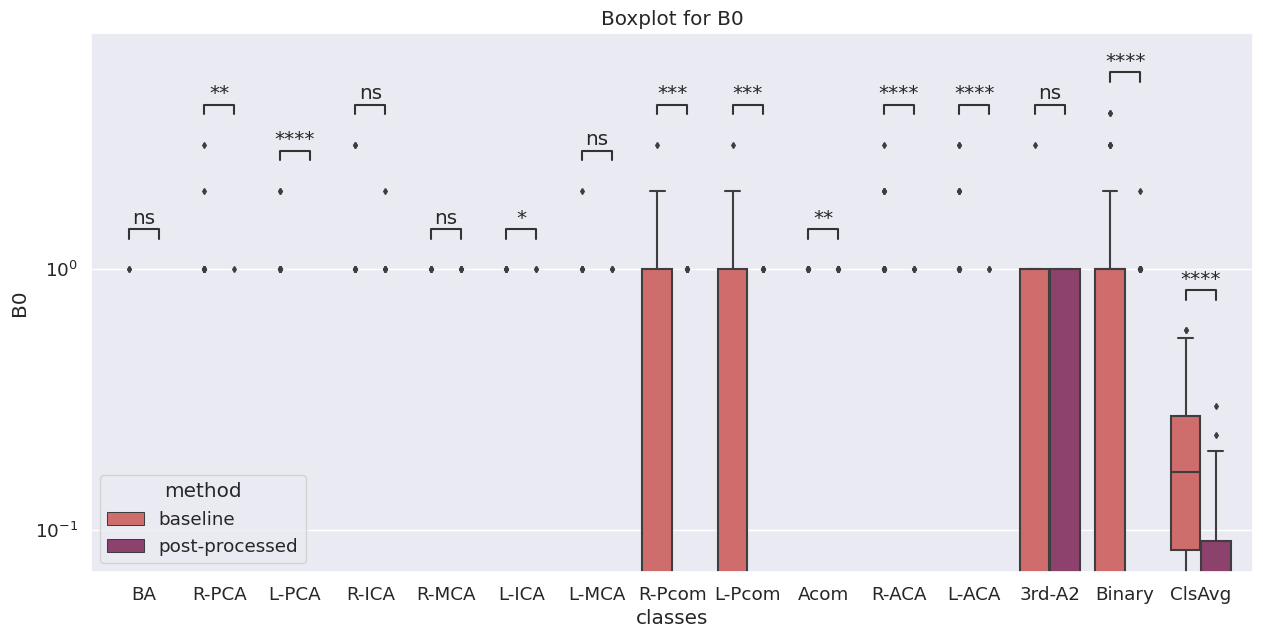

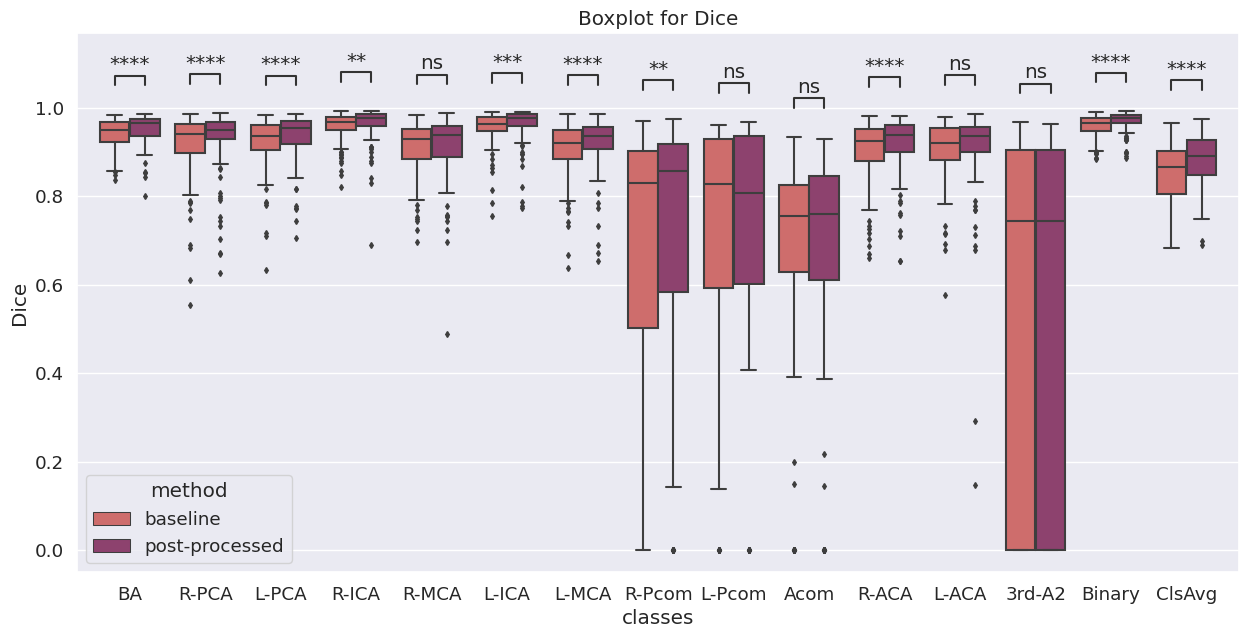

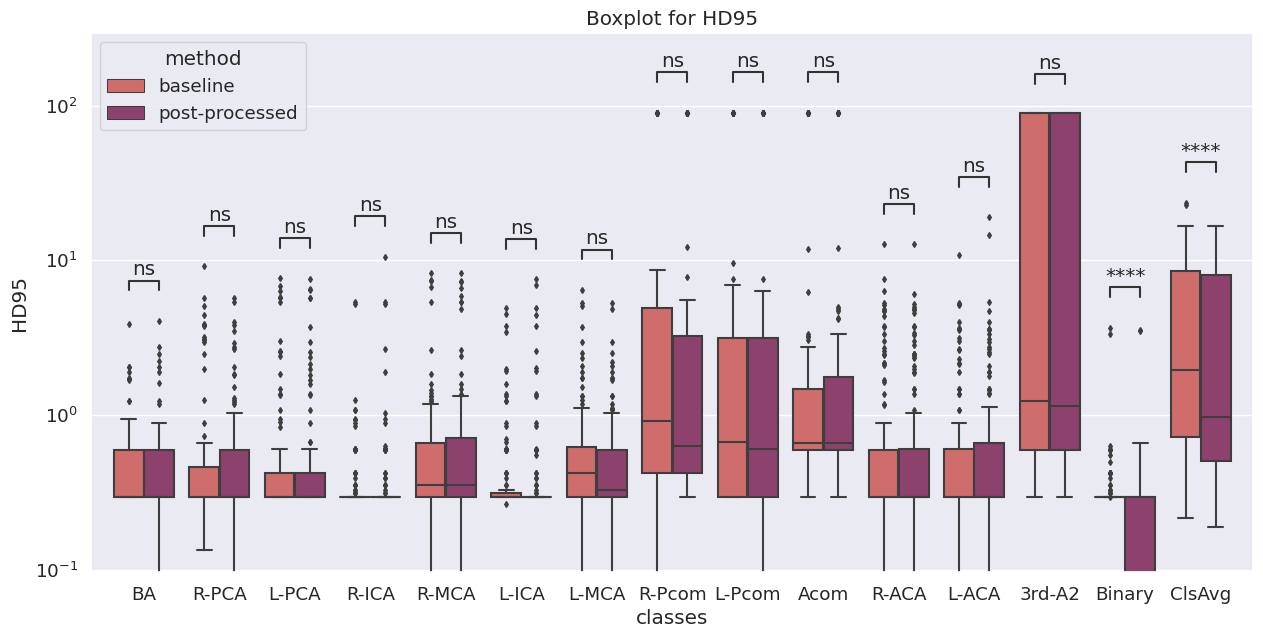

In [13]:
### Boxplots by test set metric WITH STAT TEST PAIRED

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'baseline', 'with_pp': 'post-processed'})

# We want to create pairs for each class
pairs = []
for class_name in desired_classes: #df_exps['classes'].unique():    
    pairs.append(((class_name, 'baseline'), (class_name, 'post-processed')))
    
## Cleaning the NaN rows:
nan_rows = df_exps[df_exps['B0'].isna()]
subjects_classes_with_nan = nan_rows[['subjects', 'classes']].drop_duplicates()
df_cleaned = df_exps.copy()
for i, subb in enumerate(subjects_classes_with_nan.subjects):
    for classs in subjects_classes_with_nan[subjects_classes_with_nan['subjects'] == subb]['classes']:
        df_cleaned = df_cleaned[~((df_cleaned['subjects'] == subb) & (df_cleaned['classes'] == classs))]


df_cleaned.rename(columns={'status': 'method'}, inplace=True)

for met in ['B0', 'Dice', 'HD95']:
    hue_plot_params = {
        'data': df_cleaned,
        'x': 'classes',
        'y': met,
        "hue": "method",
        "palette": 'flare',  # 'flare' or 'crest'
        "width": 0.8, 
        "fliersize": 3,
        "order":desired_classes, 
    }
    sns.set_theme(rc={'figure.figsize':(15,7)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    
    
    if not met == 'Dice':
        ax.set_yscale('log')  # FIXME:
    # ax.set_ylim(0,20)
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_paired", verbose=0).apply_and_annotate()  # FIXME: should be 't-test_paired' but some subjects might not have a value for both status..
    # ax.legend(loc=(1.0, 0.88))
    # ax.legend(loc="lower right")  #, markerscale=1, fontsize=10)  # Example to position it to the right outside
    plt.title(f'Boxplot for {met}')
    plt.show()


In [157]:
nan_rows = df_exps[df_exps['B0'].isna()]
subjects_classes_with_nan = nan_rows[['subjects', 'classes']].drop_duplicates()
df_cleaned = df_exps.copy()
for i, subb in enumerate(subjects_classes_with_nan.subjects):
    for classs in subjects_classes_with_nan[subjects_classes_with_nan['subjects'] == subb]['classes']:
        df_cleaned = df_cleaned[~((df_cleaned['subjects'] == subb) & (df_cleaned['classes'] == classs))]

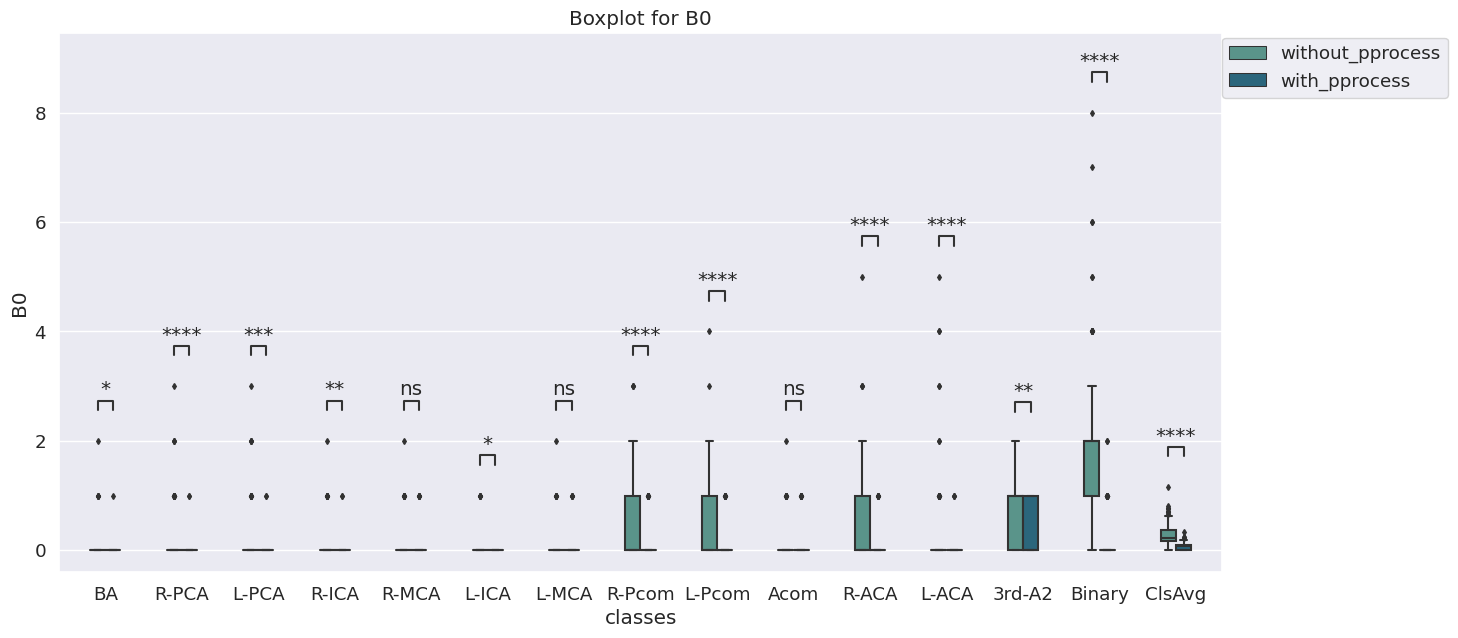

In [159]:
hue_plot_params = {
    'data': df_cleaned,
    'x': 'classes',
    'y': met,
    "hue": "status",
    "palette": 'crest',  # 'flare' or 'crest'
    "width": 0.4, 
    "fliersize": 3,
    "order":desired_classes, 
}
sns.set_theme(rc={'figure.figsize':(15,7)})
sns.set_theme(font_scale=1.2)
ax = sns.boxplot( **hue_plot_params)
annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.configure(test="t-test_paired", verbose=0).apply_and_annotate()  # FIXME: should be 't-test_paired' but some subjects might not have a value for both status..
ax.legend(loc=(1.0, 0.88))
plt.title(f'Boxplot for {met}')
plt.show()

In [ ]:
### Boxplots by test set metric WITH STAT TEST

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'without_pprocess', 'with_pp': 'with_pprocess'})

# We want to create pairs for each class
pairs = []
for class_name in desired_classes: #df_exps['classes'].unique():    
    pairs.append(((class_name, 'without_pprocess'), (class_name, 'with_pprocess')))
    

# for met in ['B0', 'Dice', 'HD95']:
for met in ['B0']:
    df_exps_cleaned = df_exps.dropna(subset=[met])
    hue_plot_params = {
        'data': df_exps,
        'x': 'classes',
        'y': met,
        "hue": "status",
        "palette": 'crest',  # 'flare' or 'crest'
        "width": 0.4, 
        "fliersize": 3,
        "order":desired_classes, 
    }
    sns.set_theme(rc={'figure.figsize':(15,7)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_paired", verbose=0).apply_and_annotate()  # FIXME: should be 't-test_paired' but some subjects might not have a value for both status..
    ax.legend(loc=(1.0, 0.88))
    plt.title(f'Boxplot for {met}')
    plt.show()


Not enough data for BA to perform the paired t-test
Not enough data for R-PCA to perform the paired t-test
Not enough data for L-PCA to perform the paired t-test
Not enough data for R-ICA to perform the paired t-test
Not enough data for R-MCA to perform the paired t-test
Not enough data for L-ICA to perform the paired t-test
Not enough data for L-MCA to perform the paired t-test
Not enough data for R-Pcom to perform the paired t-test
Not enough data for L-Pcom to perform the paired t-test
Not enough data for Acom to perform the paired t-test
Not enough data for R-ACA to perform the paired t-test
Not enough data for L-ACA to perform the paired t-test
Not enough data for 3rd-A2 to perform the paired t-test
Not enough data for Binary to perform the paired t-test
Not enough data for ClsAvg to perform the paired t-test


ValueError: unequal length arrays

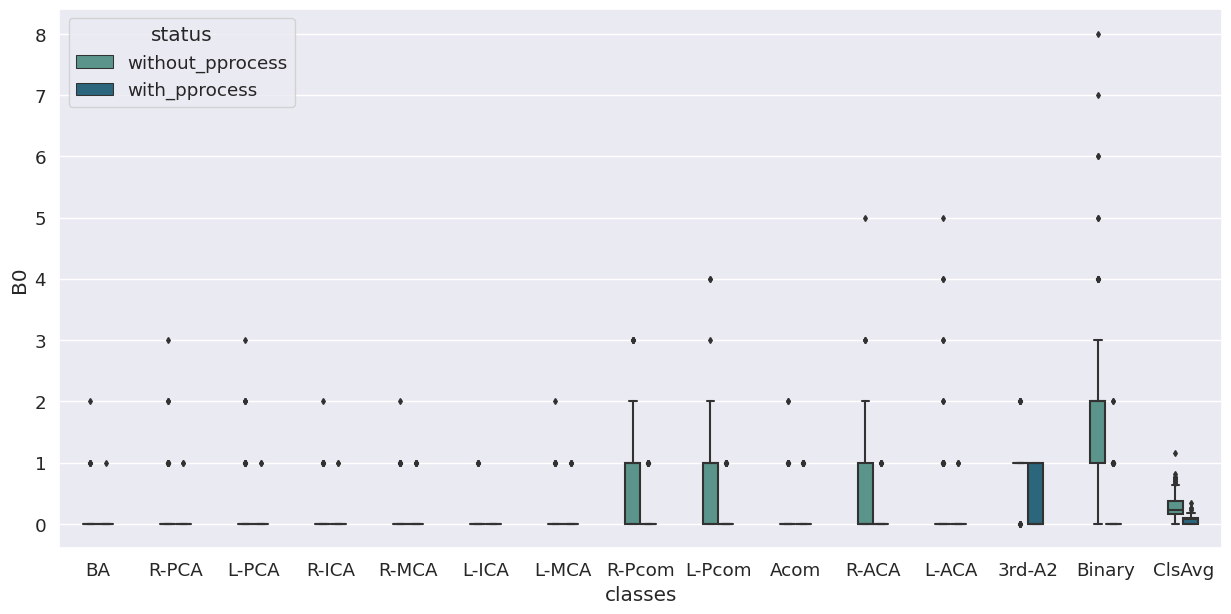

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy import stats

# Load the data
df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
# df_exps = pd.read_csv('/home/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t')  # Uncomment if needed
desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'without_pprocess', 'with_pp': 'with_pprocess'})

# Create pairs for each class
pairs = []
for class_name in desired_classes:    
    pairs.append(((class_name, 'without_pprocess'), (class_name, 'with_pprocess')))

# Loop through metrics
for met in ['B0', 'Dice', 'HD95']:
    # Filter out NaN values for the metric
    df_exps_cleaned = df_exps.dropna(subset=[met])  # Drop rows where the metric column has NaN

    # Create a separate dataframe for each group: without_pprocess and with_pprocess
    df_without_pp = df_exps_cleaned[df_exps_cleaned['status'] == 'without_pprocess']
    df_with_pp = df_exps_cleaned[df_exps_cleaned['status'] == 'with_pprocess']

    # Ensure both groups have matching 'classes' and corresponding data
    for class_name in desired_classes:
        df_without_pp_class = df_without_pp[df_without_pp['classes'] == class_name]
        df_with_pp_class = df_with_pp[df_with_pp['classes'] == class_name]
        
        # We want to find pairs for each class where both "without_pprocess" and "with_pprocess" exist
        # Ensure that there are no NaNs in both "without_pprocess" and "with_pprocess" for the class
        df_without_pp_class = df_without_pp_class.dropna(subset=[met])  # Drop NaNs in the current class for 'without_pprocess'
        df_with_pp_class = df_with_pp_class.dropna(subset=[met])  # Drop NaNs in the current class for 'with_pprocess'
        
        # Find common indices (where both groups have data for the same class)
        common_indices = df_without_pp_class.index.intersection(df_with_pp_class.index)
        
        # Only keep the rows where both groups have data for the same class
        df_without_pp_class = df_without_pp_class.loc[common_indices]
        df_with_pp_class = df_with_pp_class.loc[common_indices]
        
        # Now we can safely perform a paired t-test if both groups have valid data
        if len(df_without_pp_class) > 0:
            # Perform the paired t-test for this class
            t_stat, p_value = stats.ttest_rel(df_without_pp_class[met], df_with_pp_class[met])
            print(f"T-statistic for {class_name} (metric: {met}): {t_stat}, p-value: {p_value}")
        else:
            print(f"Not enough data for {class_name} to perform the paired t-test")

    # Prepare plotting parameters
    hue_plot_params = {
        'data': df_exps_cleaned,
        'x': 'classes',
        'y': met,
        "hue": "status",
        "palette": 'crest',  # 'flare' or 'crest'
        "width": 0.4, 
        "fliersize": 3,
        "order": desired_classes, 
    }

    # Set the plotting theme
    sns.set_theme(rc={'figure.figsize': (15, 7)})
    sns.set_theme(font_scale=1.2)
    
    # Create the boxplot
    ax = sns.boxplot(**hue_plot_params)
    
    # Annotate with statistical test (paired t-test)
    annotator = Annotator(ax, pairs, **hue_plot_params)
    
    # Apply the paired t-test and annotate the plot
    annotator.configure(test="t-test_paired", verbose=0).apply_and_annotate()

    # Adjust legend and title
    ax.legend(loc=(1.0, 0.88))
    plt.title(f'Boxplot for {met}')
    
    # Show the plot
    plt.show()


In [ ]:
import pandas as pd

# Check if there are NaN values in 'B0' for both 'without_pprocess' and 'with_pprocess' and the 'classes' == sub
if pd.isna(df_tmp[(df_tmp['status'] == 'without_pprocess') & (df_tmp['classes'] == sub)]['B0']).any() or pd.isna(df_tmp[(df_tmp['status'] == 'with_pprocess') & (df_tmp['classes'] == sub)]['B0']).any():
    print(f"There is a NaN value in 'B0' for either 'without_pprocess' or 'with_pprocess' and classes = {sub}")
else:
    print(f"No NaN values found in 'B0' for the given conditions (classes = {sub})")

In [18]:
met = 'HD95' #'Dice' #'B0'

for clas in (df_exps.classes.drop_duplicates()):
    df_tmp = df_exps[df_exps['classes'] == clas]
    for sub in df_tmp.subjects.drop_duplicates():
        # if df_tmp[(df_tmp['status'] == 'without_pprocess') & (df_tmp['classes'] == sub)]['B0'] df_tmp[(df_tmp['status'] == 'with_pprocess') & (df_tmp['classes'] == sub)]['B0']
        if pd.isna(df_tmp[(df_tmp['status'] == 'without_pprocess') & (df_tmp['classes'] == sub)][met]).any() or pd.isna(df_tmp[(df_tmp['status'] == 'with_pprocess') & (df_tmp['classes'] == sub)][met]).any():
            print(f"There is a NaN value in 'B0' for either 'without_pprocess' or 'with_pprocess' and classes = {sub}")
            print(df_tmp[(df_tmp['status'] == 'without_pprocess') & (df_tmp['classes'] == sub)][met])
            print(df_tmp[(df_tmp['status'] == 'with_pprocess') & (df_tmp['classes'] == sub)][met])
        # else:
        #     print(f"No NaN values found in 'B0' for the given conditions (classes = {sub})")


In [44]:
df_exps_cleaned

,Unnamed: 0,subjects,classes,status,B0,Dice,HD95
1,1,sub_2,3rd-A2,without_pprocess,1.0,0.000000,90.000000
5,5,sub_6,3rd-A2,without_pprocess,0.0,0.013158,6.145808
7,7,sub_8,3rd-A2,without_pprocess,2.0,0.000000,90.000000
10,10,sub_11,3rd-A2,without_pprocess,0.0,0.709434,2.000000
13,13,sub_14,3rd-A2,without_pprocess,0.0,0.875969,0.552734
...,...,...,...,...,...,...,...
3741,3741,sub_117,R-Pcom,with_pprocess,0.0,0.800989,0.700012
3743,3743,sub_119,R-Pcom,with_pprocess,0.0,0.895522,0.462891
3744,3744,sub_120,R-Pcom,with_pprocess,0.0,0.903226,0.485278
3745,3745,sub_121,R-Pcom,with_pprocess,0.0,0.937888,0.406250


In [ ]:
df_tmp[(df_tmp['status'] == 'without_pprocess') & (df_tmp['subjects'] == sub)][met]

1874    False
Name: HD95, dtype: bool

In [30]:
df_tmp[(df_tmp['status'] == 'without_pprocess') & (df_tmp['classes'] == sub)]

,Unnamed: 0,subjects,classes,status,B0,Dice,HD95


In [26]:
df_tmp[df_tmp['subjects'] == 'sub_125']

,Unnamed: 0,subjects,classes,status,B0,Dice,HD95
1874,1874,sub_125,R-Pcom,without_pprocess,1.0,0.0,90.0
3749,3749,sub_125,R-Pcom,with_pprocess,NaN,NaN,NaN


In [5]:
unique_pairs = df_exps.groupby(['classes', 'status']).size().reset_index(name='count')
print(unique_pairs)

   classes            status  count
0   3rd-A2     with_pprocess    125
1   3rd-A2  without_pprocess    125
2     Acom     with_pprocess    125
3     Acom  without_pprocess    125
4       BA     with_pprocess    125
5       BA  without_pprocess    125
6   Binary     with_pprocess    125
7   Binary  without_pprocess    125
8   ClsAvg     with_pprocess    125
9   ClsAvg  without_pprocess    125
10   L-ACA     with_pprocess    125
11   L-ACA  without_pprocess    125
12   L-ICA     with_pprocess    125
13   L-ICA  without_pprocess    125
14   L-MCA     with_pprocess    125
15   L-MCA  without_pprocess    125
16   L-PCA     with_pprocess    125
17   L-PCA  without_pprocess    125
18  L-Pcom     with_pprocess    125
19  L-Pcom  without_pprocess    125
20   R-ACA     with_pprocess    125
21   R-ACA  without_pprocess    125
22   R-ICA     with_pprocess    125
23   R-ICA  without_pprocess    125
24   R-MCA     with_pprocess    125
25   R-MCA  without_pprocess    125
26   R-PCA     with_pprocess

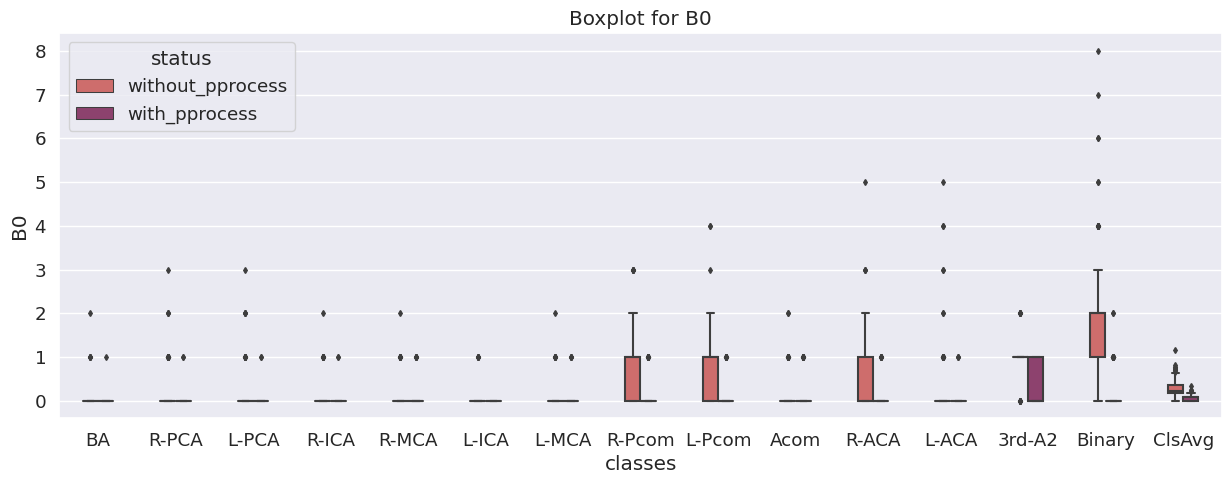

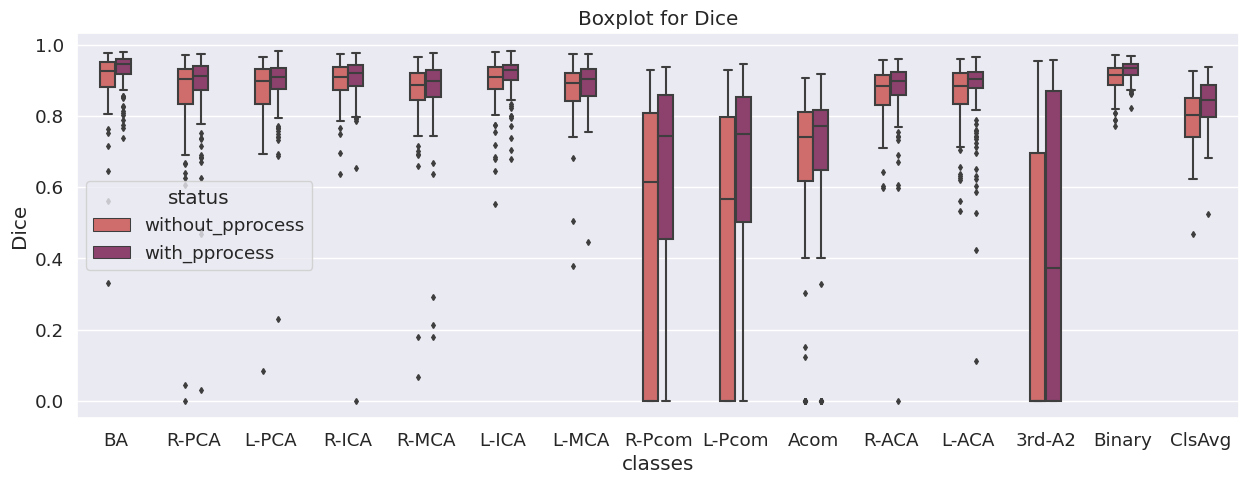

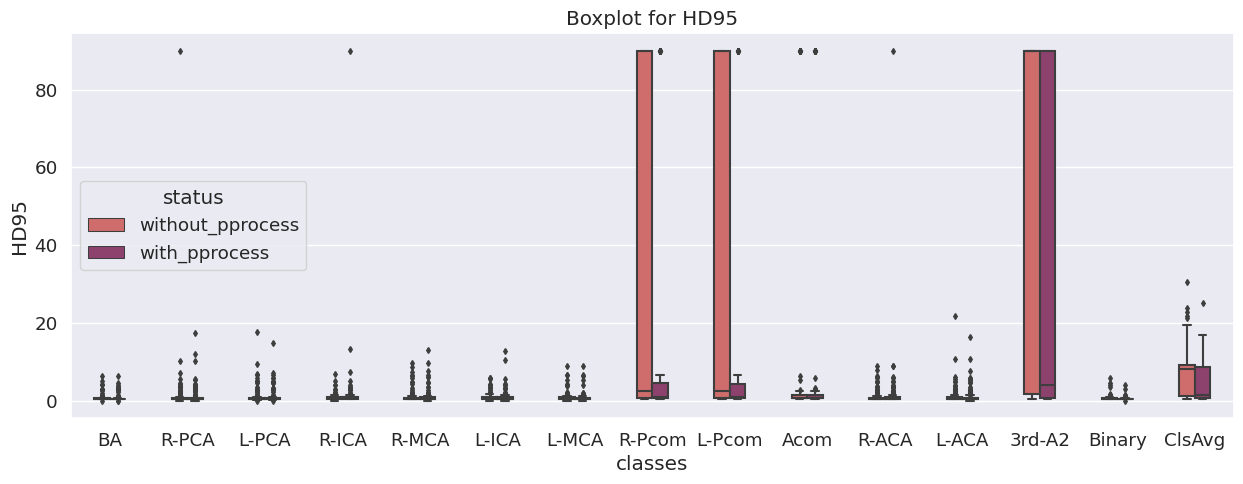

In [9]:
### Boxplots by test set metric

import seaborn as sns
import matplotlib.pyplot as plt


df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_cta_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()
desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'without_pprocess', 'with_pp': 'with_pprocess'})

for met in ['B0', 'Dice', 'HD95']:
    sns.set_theme(rc={'figure.figsize':(15,5)})
    sns.set_theme(font_scale=1.2)
    sns.boxplot(y=met, x='classes', 
                data=df_exps, palette="flare",  # 'flare' or 'crest'
                hue='status',
                order=desired_classes,  # Specify the order of classes
                width=0.4, fliersize=3).set(title=f'Boxplot for {met}')
    plt.show()


In [6]:
import ast
metrics_with_pp['case'].keys()
metrics_with_pp['case']['Dice_ClsAvgDice']
metrics_with_pp['case']['HD95_ClsAvgHD95']
metrics_with_pp['case']['clDice']


mets = ['Dice_ClsAvgDice', 'HD95_ClsAvgHD95', 'clDice']
df = pd.DataFrame(columns=['metric', 'index', 'status', 'value'])
for met in mets:
    for idx, val in metrics_with_pp['case'][met].items():
        new_row = pd.DataFrame({
            'index': [idx],
            'metric': [met],
            'status': 'with_pp',
            'value': [val],
        })
        df = pd.concat([df, new_row], ignore_index=True)

    for idx, val in metrics_without_pp['case'][met].items():
        new_row = pd.DataFrame({
            'index': [idx],
            'metric': [met],
            'status': 'without_pp',
            'value': [val],
        })
        df = pd.concat([df, new_row], ignore_index=True)

df

,metric,index,status,value
0,Dice_ClsAvgDice,0,with_pp,0.729600
1,Dice_ClsAvgDice,1,with_pp,0.732591
2,Dice_ClsAvgDice,2,with_pp,0.824273
3,Dice_ClsAvgDice,3,with_pp,0.875548
4,Dice_ClsAvgDice,4,with_pp,0.807807
...,...,...,...,...
745,clDice,120,without_pp,0.967452
746,clDice,121,without_pp,0.995614
747,clDice,122,without_pp,0.975977
748,clDice,123,without_pp,0.994941


In [ ]:
### Boxplots by test set metric

import seaborn as sns
import matplotlib.pyplot as plt

df_exps = df.copy()

for met in ['Dice_ClsAvgDice', 'HD95_ClsAvgHD95', 'clDice']:
    sns.set_theme(rc={'figure.figsize':(15,5)})
    sns.set_theme(font_scale=1.2)
    sns.boxplot(y=df[df['metric'] == met]['value'], x='status', 
                data=df_exps, palette="flare",
                hue='Model', 
                width=0.4, fliersize=3).set(title=f'Boxplot for {met}')
    plt.show()


#### Best-Worst improvements

In [40]:
import os
import json
import numpy as np
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge_final/nnunet_dir/dataset/preprocessed/Dataset808_TopCoWSegMRA/splits_final.json', 'r') as file:
    splits = json.load(file)


metrics_with_pp['case'].keys()
metrics_with_pp['case']['Dice_ClsAvgDice']
metrics_with_pp['case']['HD95_ClsAvgHD95']
metrics_with_pp['case']['clDice']


mets = ['Dice_ClsAvgDice', 'clDice']  #'HD95_ClsAvgHD95
df = pd.DataFrame(columns=['metric', 'index', 'val_with_pp', 'val_without_pp'])
for met in mets:
    for idx, val_with in metrics_with_pp['case'][met].items():
        if val_with < metrics_without_pp['case'][met][idx] - 0.02:  # Worse
        # if val_with > metrics_without_pp['case'][met][idx] + 0.15: #0.05:  # Better
            new_row = pd.DataFrame({
                'metric': [met],
                'index': [int(idx)+1],
                'val_with_pp': [val_with],
                'val_without_pp': [metrics_without_pp['case'][met][idx]]
            })
            df = pd.concat([df, new_row], ignore_index=True)
print(len(df[df['metric'] == 'Dice_ClsAvgDice']))
df[df['metric'] == 'Dice_ClsAvgDice']


4


,metric,index,val_with_pp,val_without_pp
0,Dice_ClsAvgDice,56,0.777550,0.817413
1,Dice_ClsAvgDice,65,0.819276,0.871476
2,Dice_ClsAvgDice,74,0.799959,0.886699
3,Dice_ClsAvgDice,112,0.719014,0.839753


In [31]:
import os
import json
import numpy as np
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge_final/nnunet_dir/dataset/preprocessed/Dataset808_TopCoWSegMRA/splits_final.json', 'r') as file:
    splits = json.load(file)


metrics_with_pp['case'].keys()
metrics_with_pp['case']['Dice_ClsAvgDice']
metrics_with_pp['case']['HD95_ClsAvgHD95']
metrics_with_pp['case']['clDice']


mets = ['HD95_ClsAvgHD95']  #'HD95_ClsAvgHD95
df = pd.DataFrame(columns=['metric', 'index', 'val_with_pp', 'val_without_pp'])
for met in mets:
    for idx, val_with in metrics_with_pp['case'][met].items():
        if val_with < metrics_without_pp['case'][met][idx] - 10:  # Worse
        # if val_with > metrics_without_pp['case'][met][idx] + 1:  # Better
            new_row = pd.DataFrame({
                'metric': [met],
                'index': [int(idx)+1],
                'val_with_pp': [val_with],
                'val_without_pp': [metrics_without_pp['case'][met][idx]]
            })
            df = pd.concat([df, new_row], ignore_index=True)
print(len(df[df['metric'] == 'HD95_ClsAvgHD95']))
df[df['metric'] == 'HD95_ClsAvgHD95']


9


,metric,index,val_with_pp,val_without_pp
0,HD95_ClsAvgHD95,35,8.871271,21.354276
1,HD95_ClsAvgHD95,42,0.814180,16.046776
2,HD95_ClsAvgHD95,43,0.592603,14.522018
3,HD95_ClsAvgHD95,45,3.756083,18.412077
4,HD95_ClsAvgHD95,51,1.227662,16.007921
5,HD95_ClsAvgHD95,90,0.499822,14.302284
6,HD95_ClsAvgHD95,98,9.967473,23.941266
7,HD95_ClsAvgHD95,114,9.335938,22.744954
8,HD95_ClsAvgHD95,116,0.437744,15.364787


#### Cropping images for qualitative eval

In [ ]:
''' MRA Box task with MRA only '''
import os
import numpy as np
import nibabel as nib
from tqdm import tqdm
from natsort import natsorted

data_path = '/home/hasna/miccai24_challenges/topcow_challenge_final/evals/cropped_for_qualitative_eval'
roi_path = '/home/hasna/datasets/TopCoW2024_Data_Release/roi_masks'

for subfold in natsorted(os.listdir(data_path)):
    if subfold != 'cropped':
        save_path = os.path.join(data_path, 'cropped', subfold)
        os.makedirs(save_path, exist_ok=True)
        for sub in tqdm(natsorted(os.listdir(os.path.join(data_path, subfold)))):
            seg_image = nib.load(os.path.join(data_path, subfold, sub))
            bbox_image = nib.load(os.path.join(roi_path, sub)).get_fdata().astype(np.uint8)
            cropped_mask = (seg_image.get_fdata())*bbox_image

            # nib.save(nib.Nifti1Image(cropped_mask.astype('int32'), affine=seg_image.affine), os.path.join(save_path, sub))


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]
